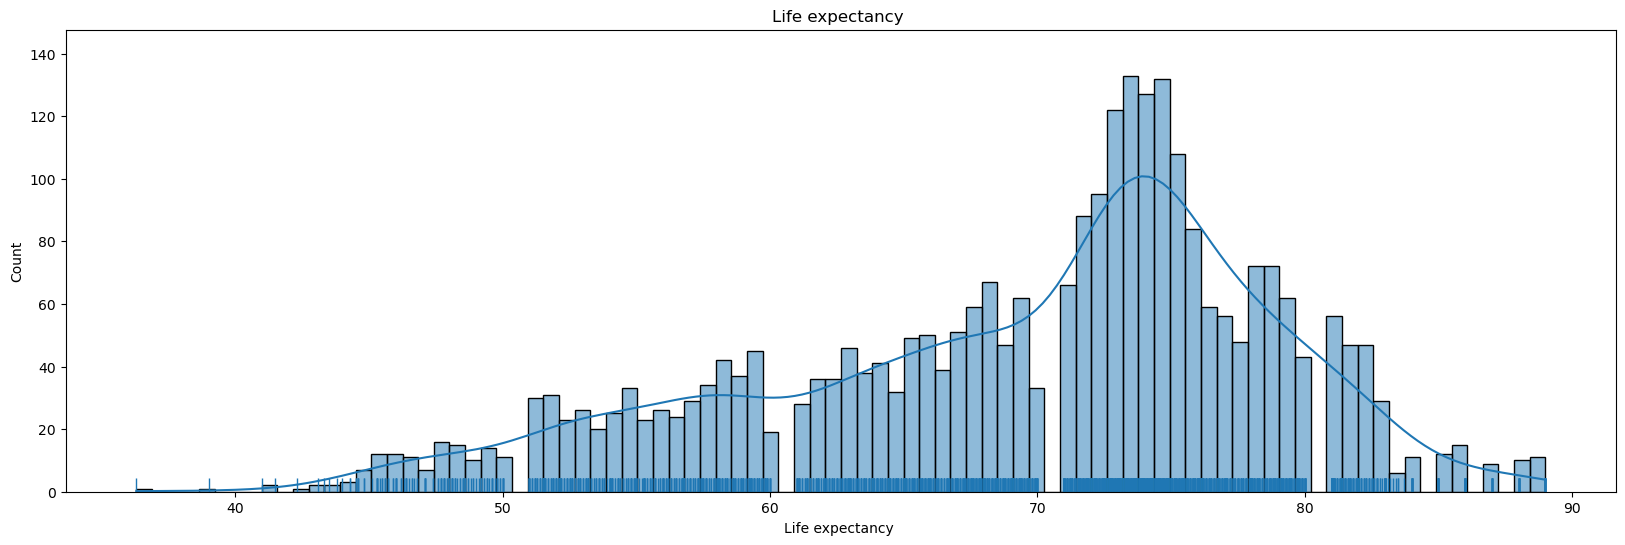

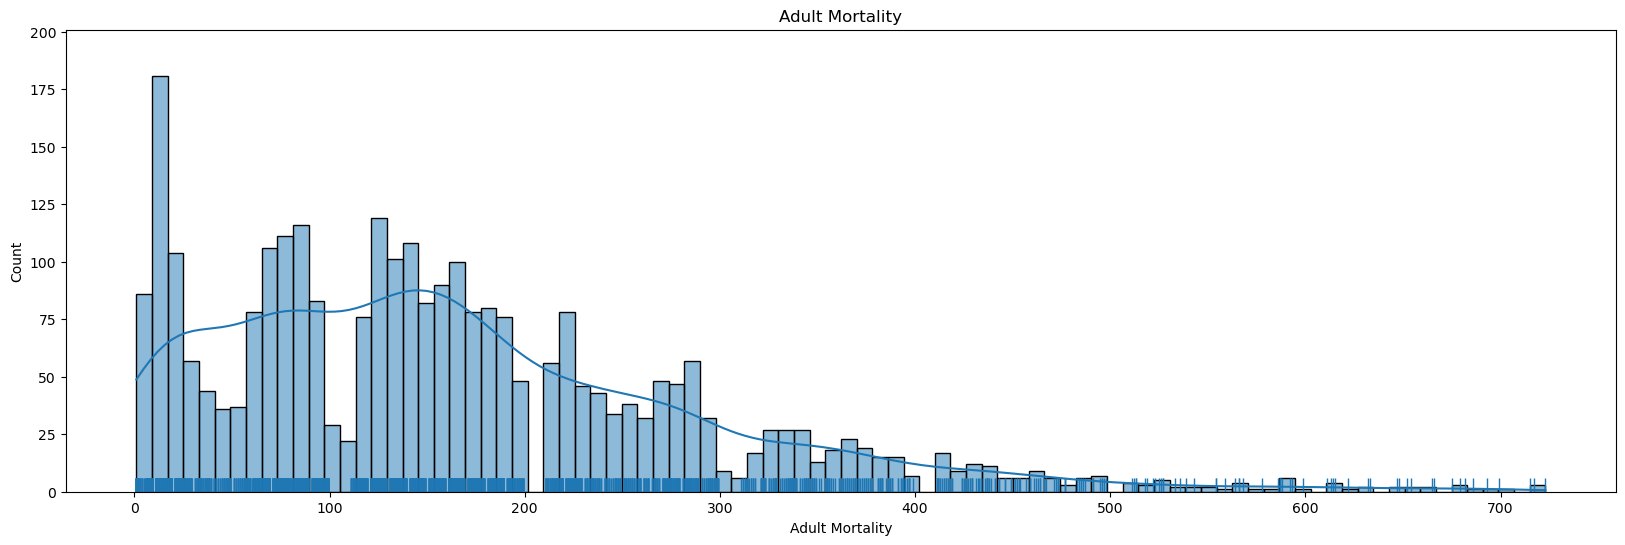

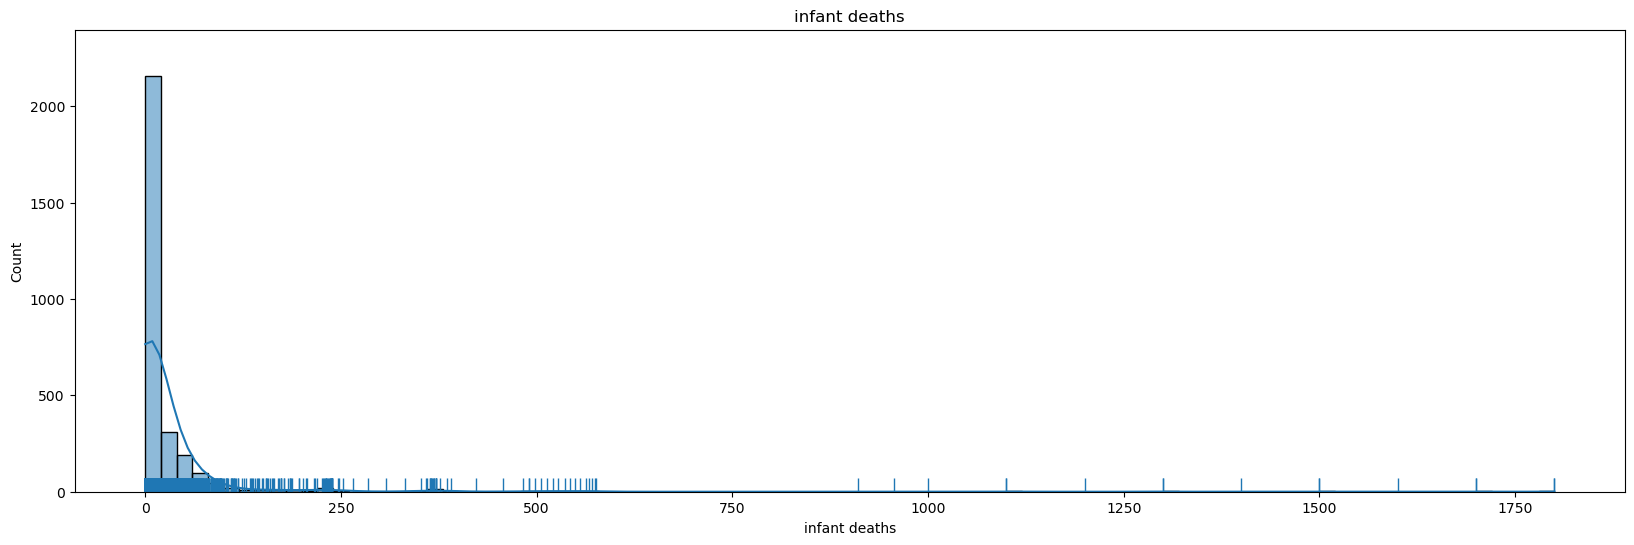

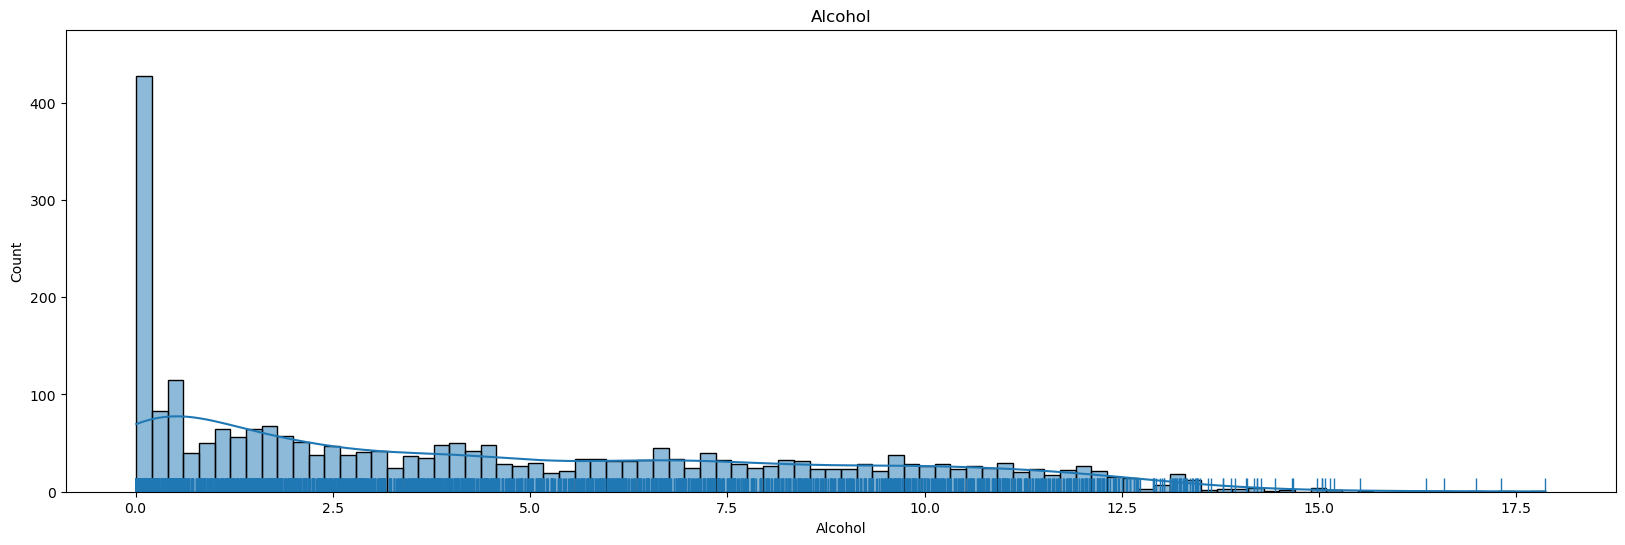

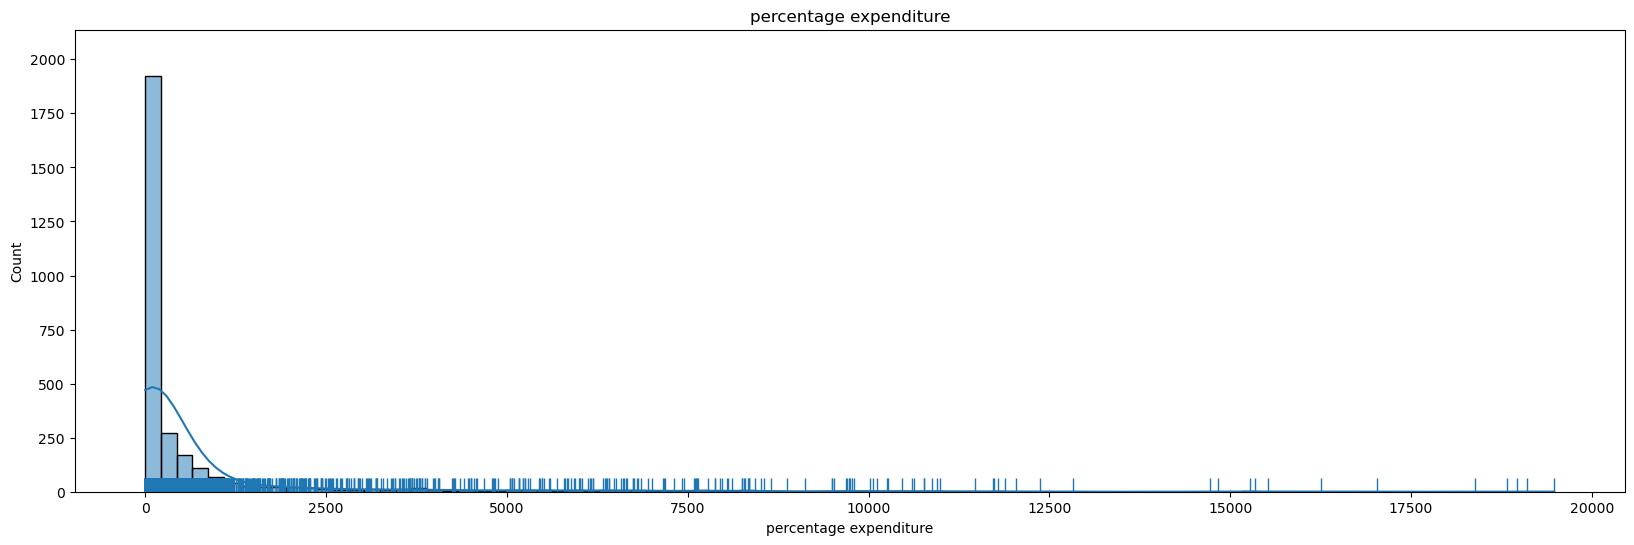

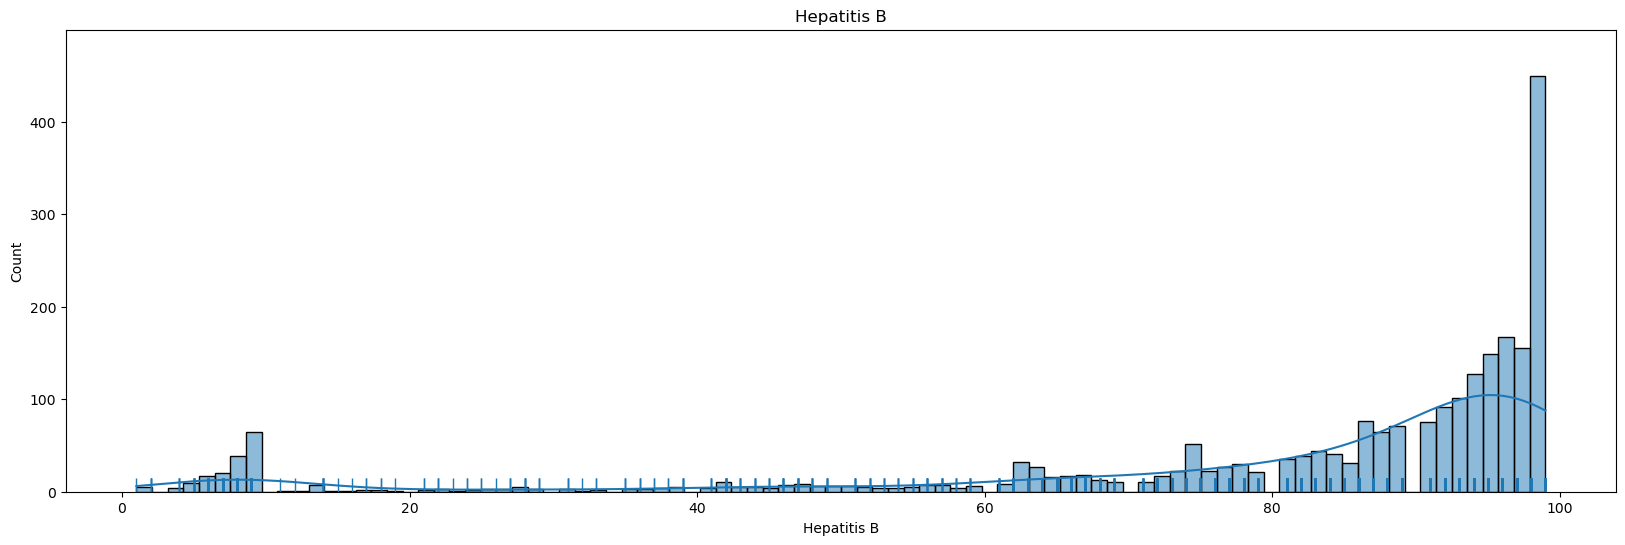

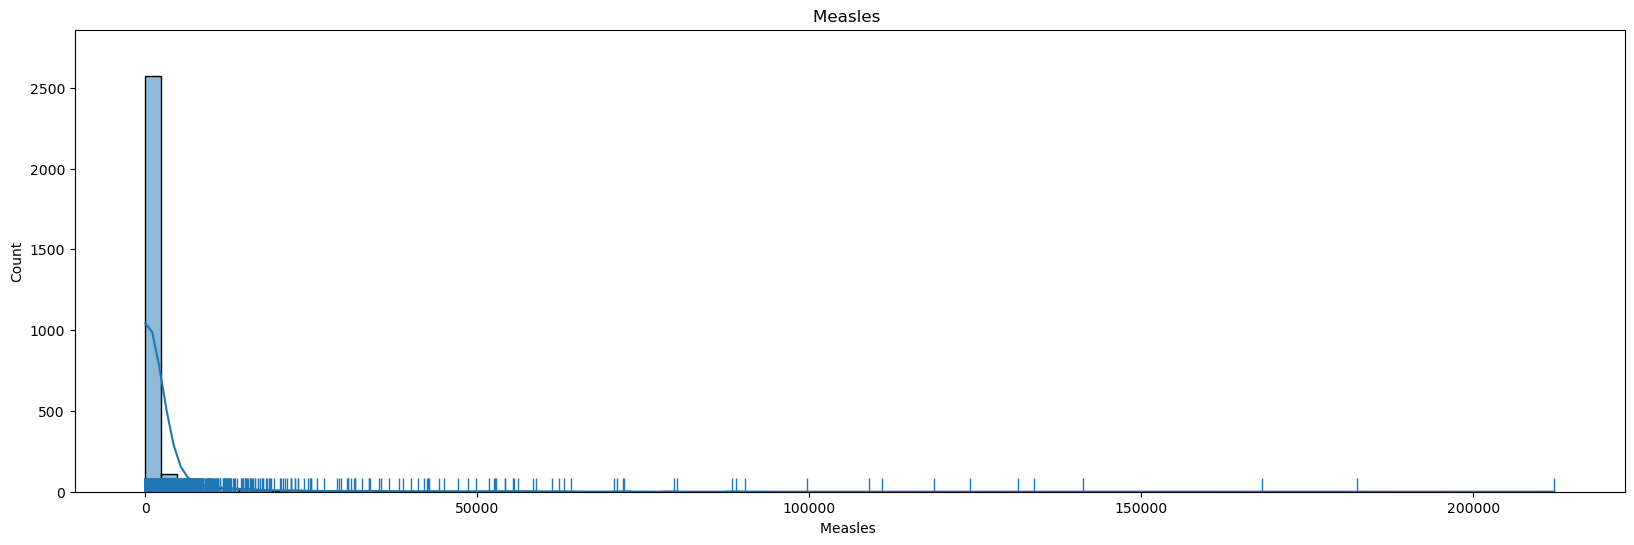

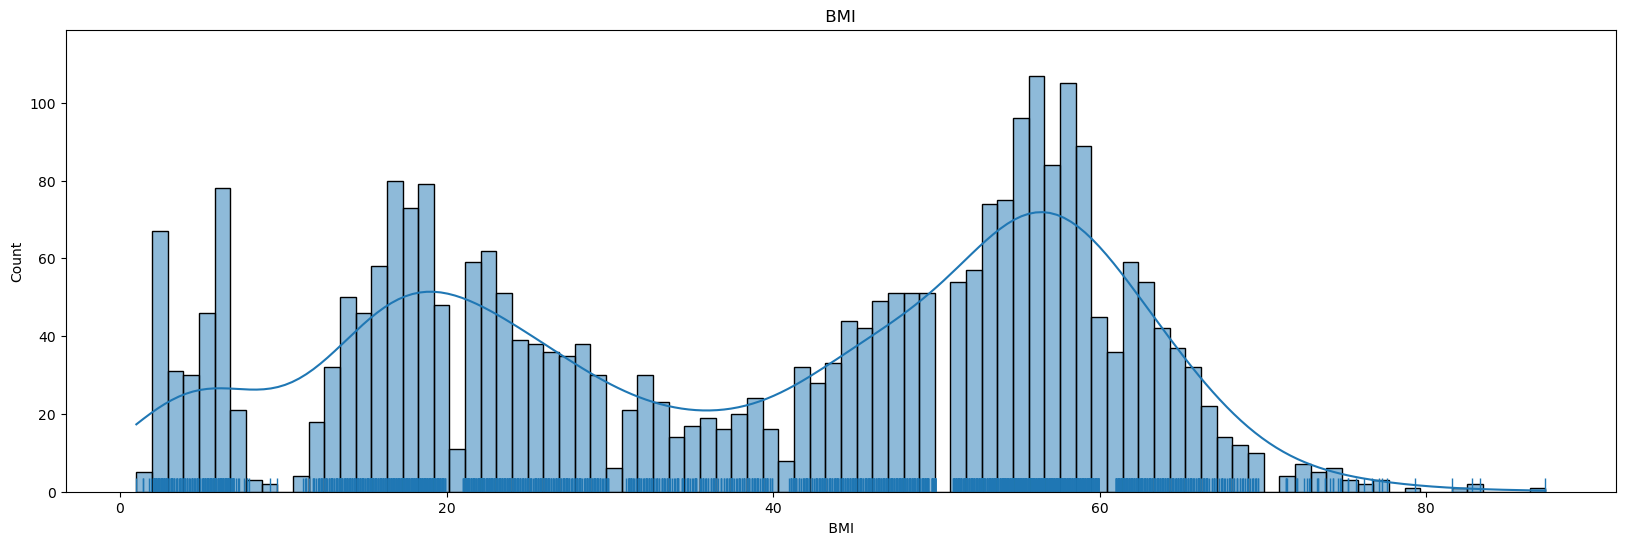

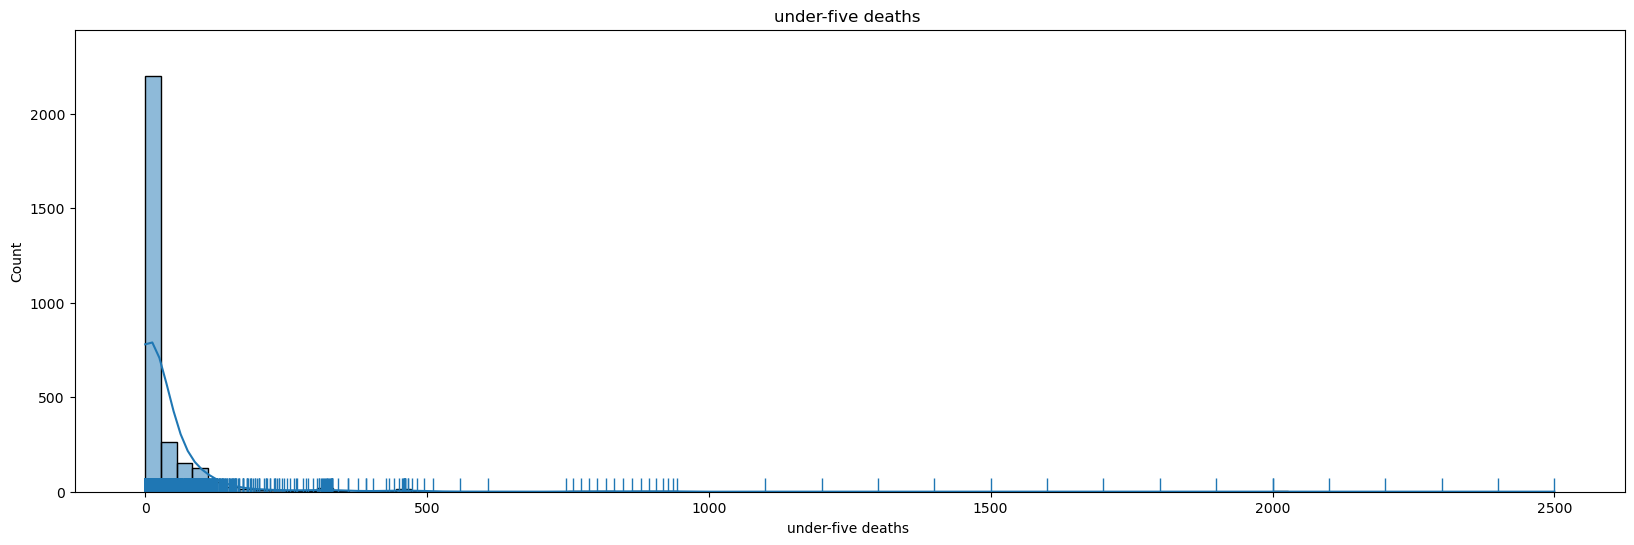

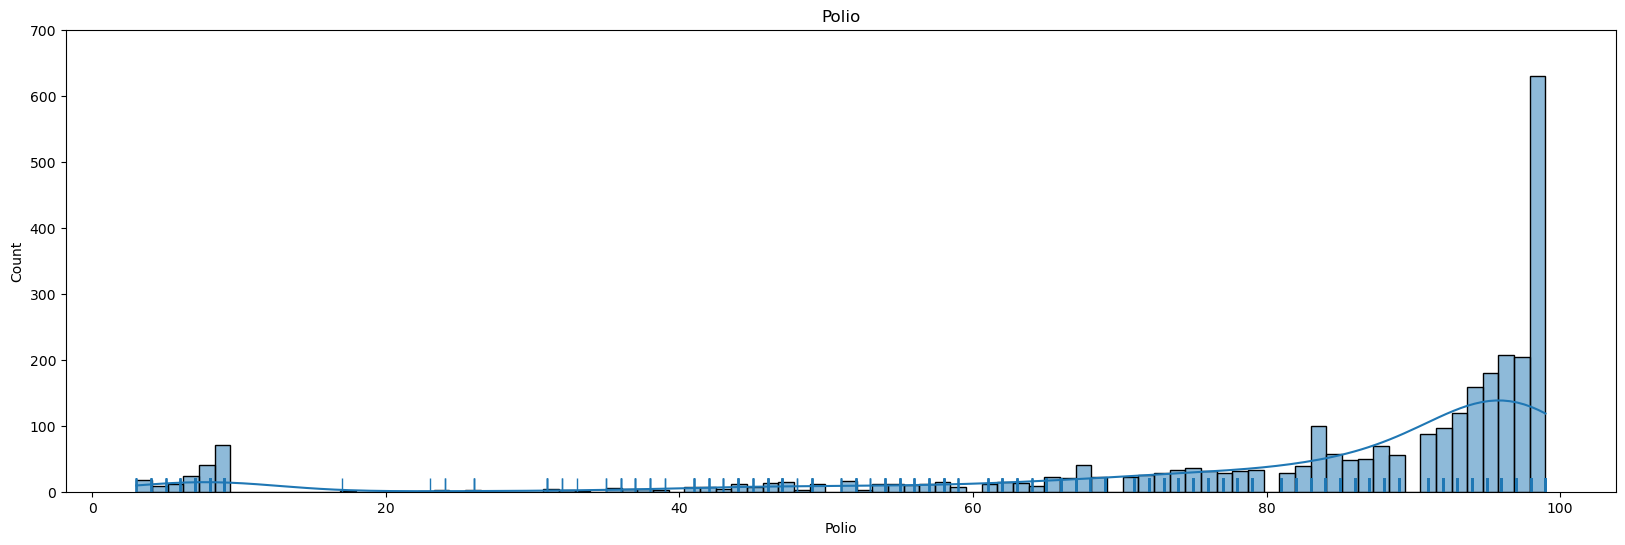

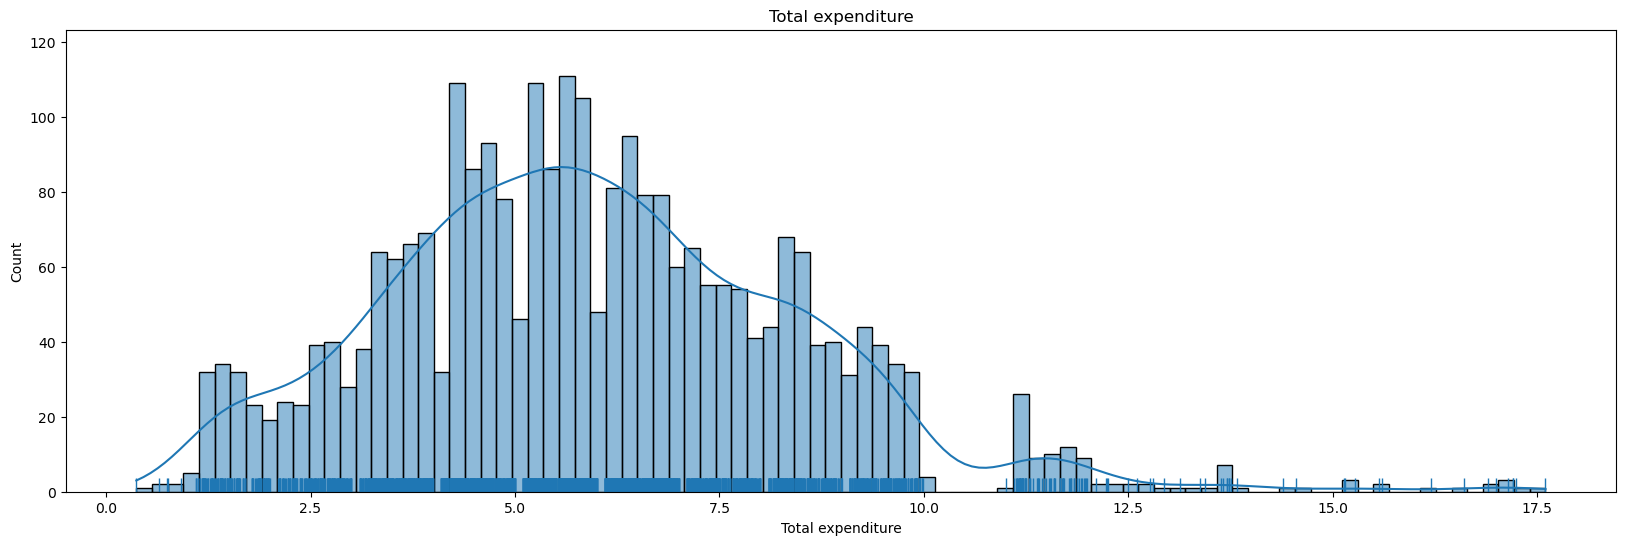

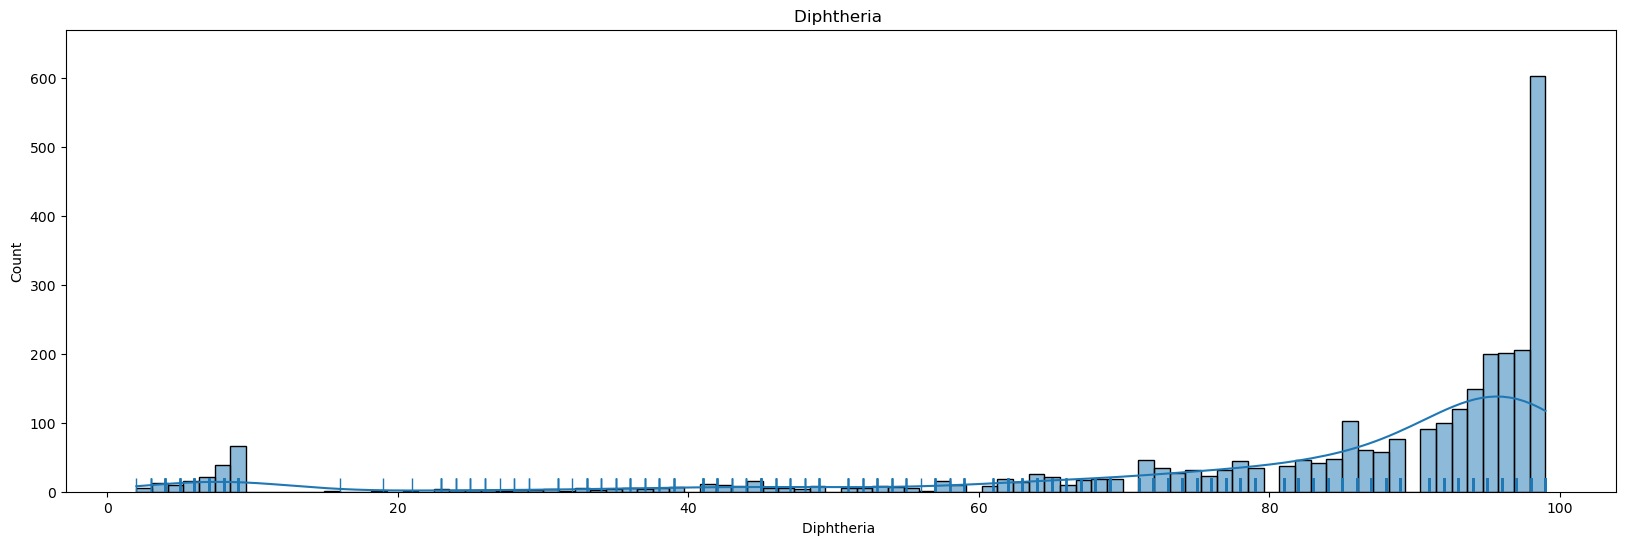

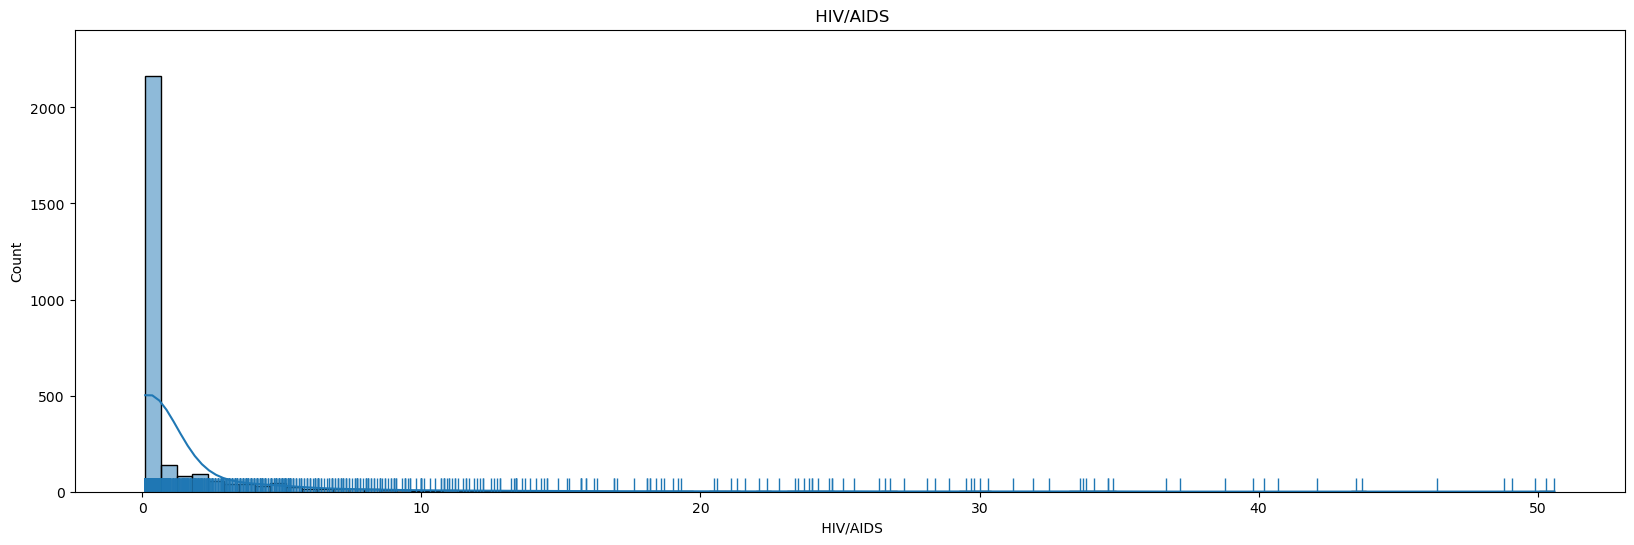

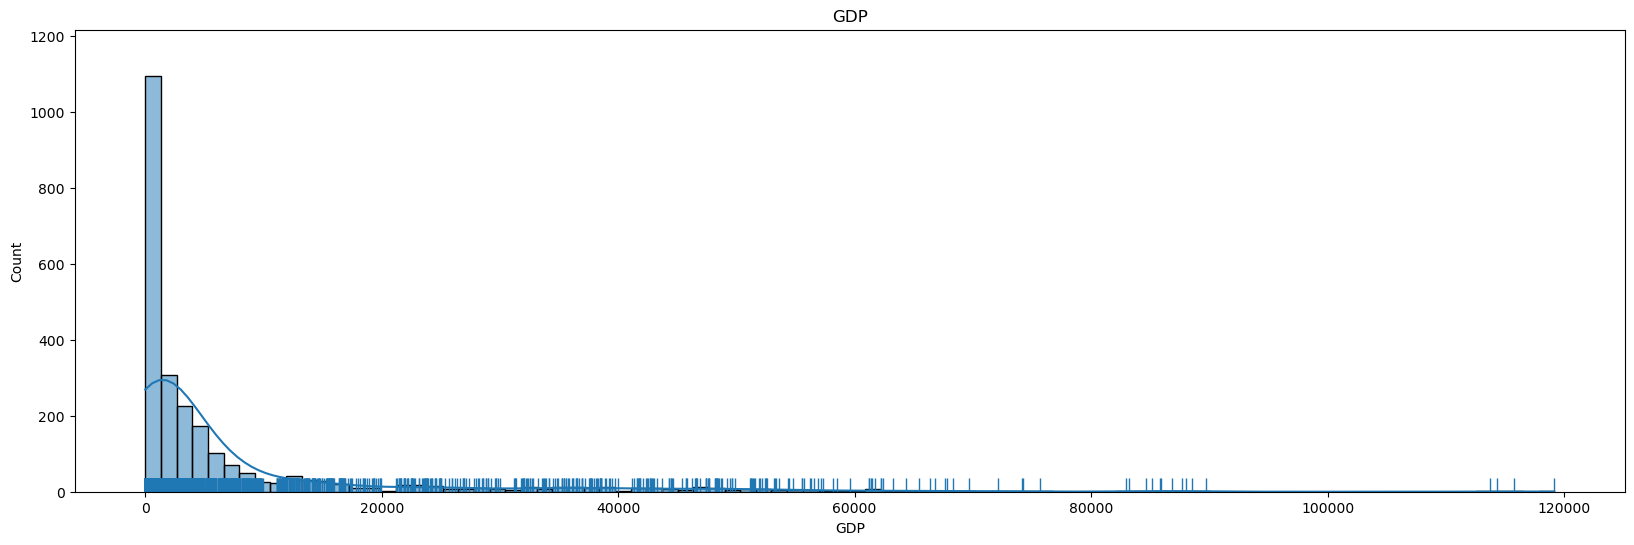

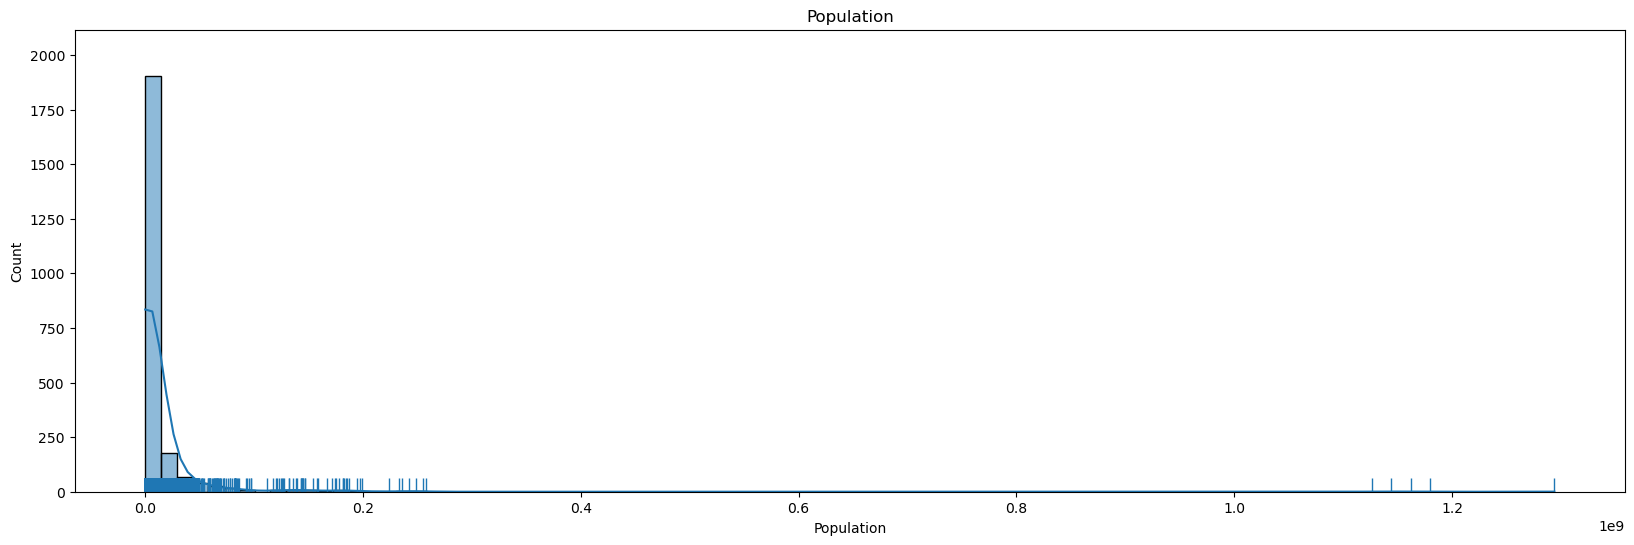

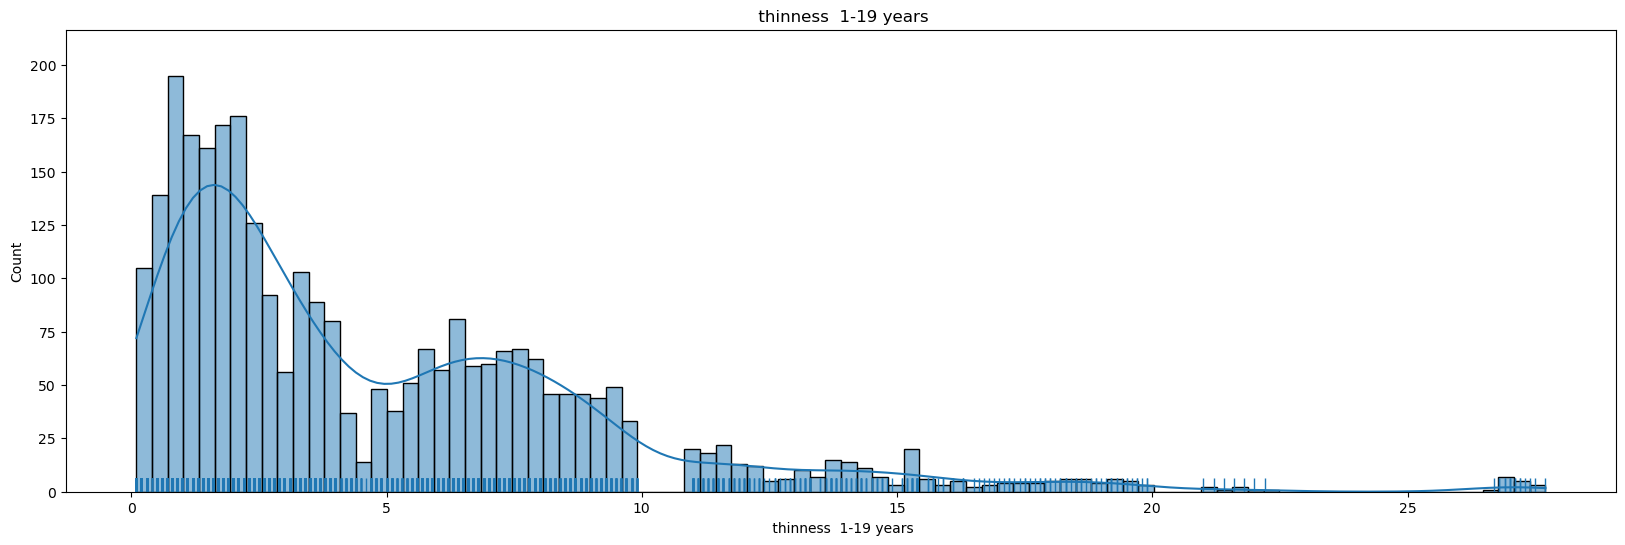

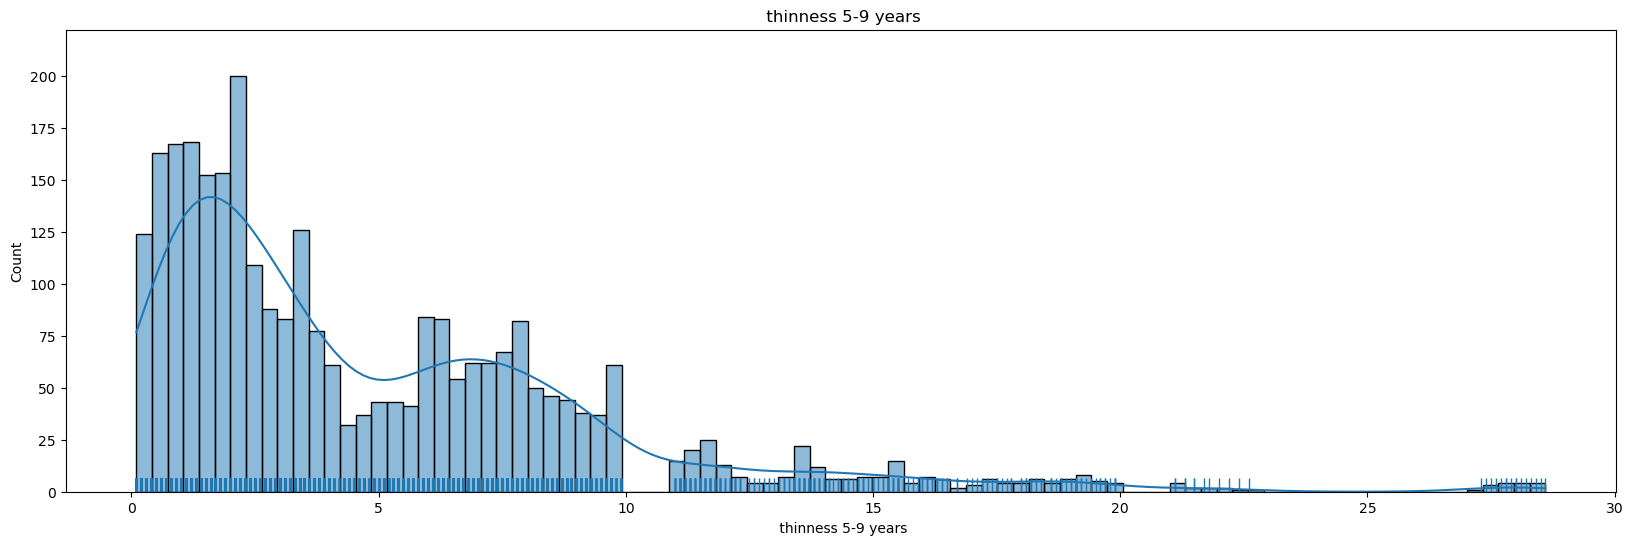

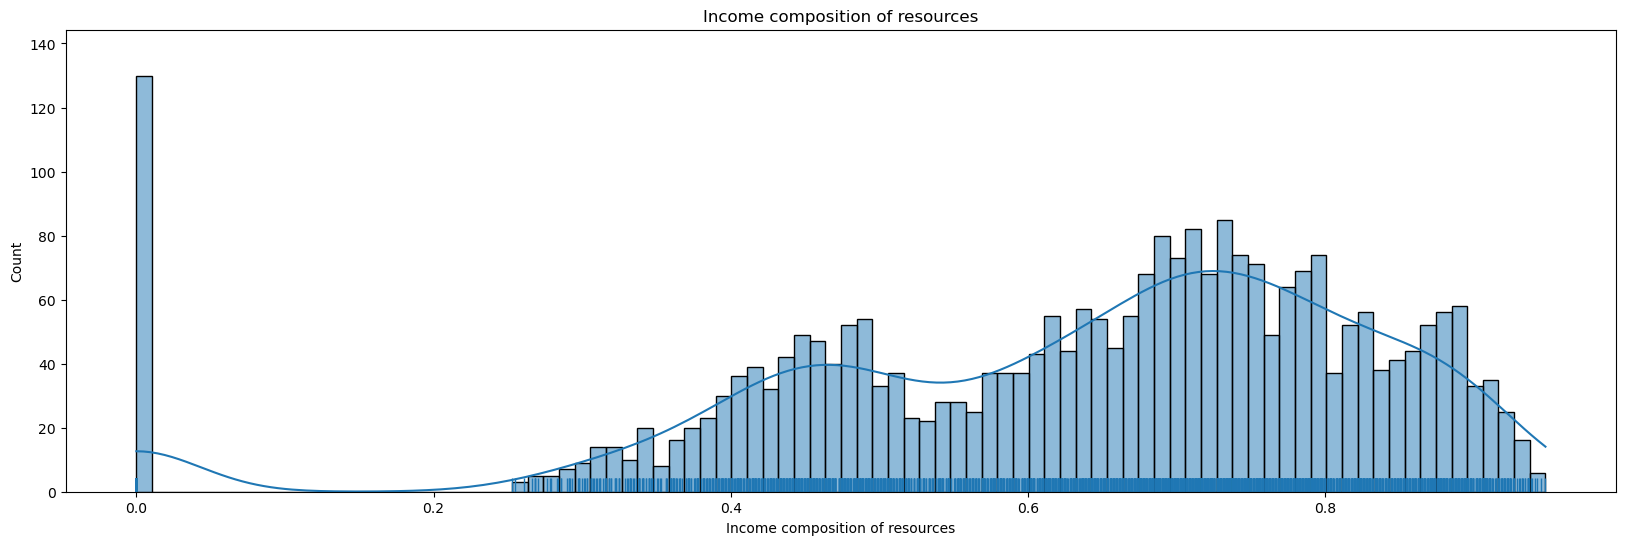

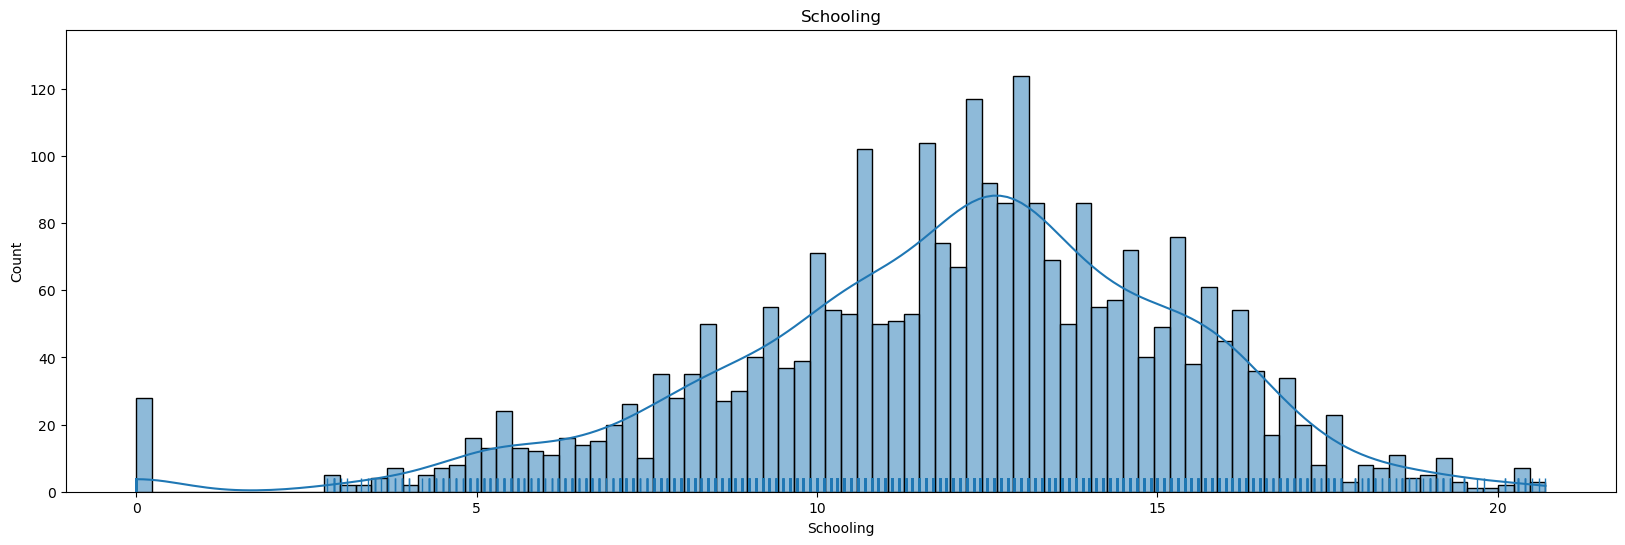

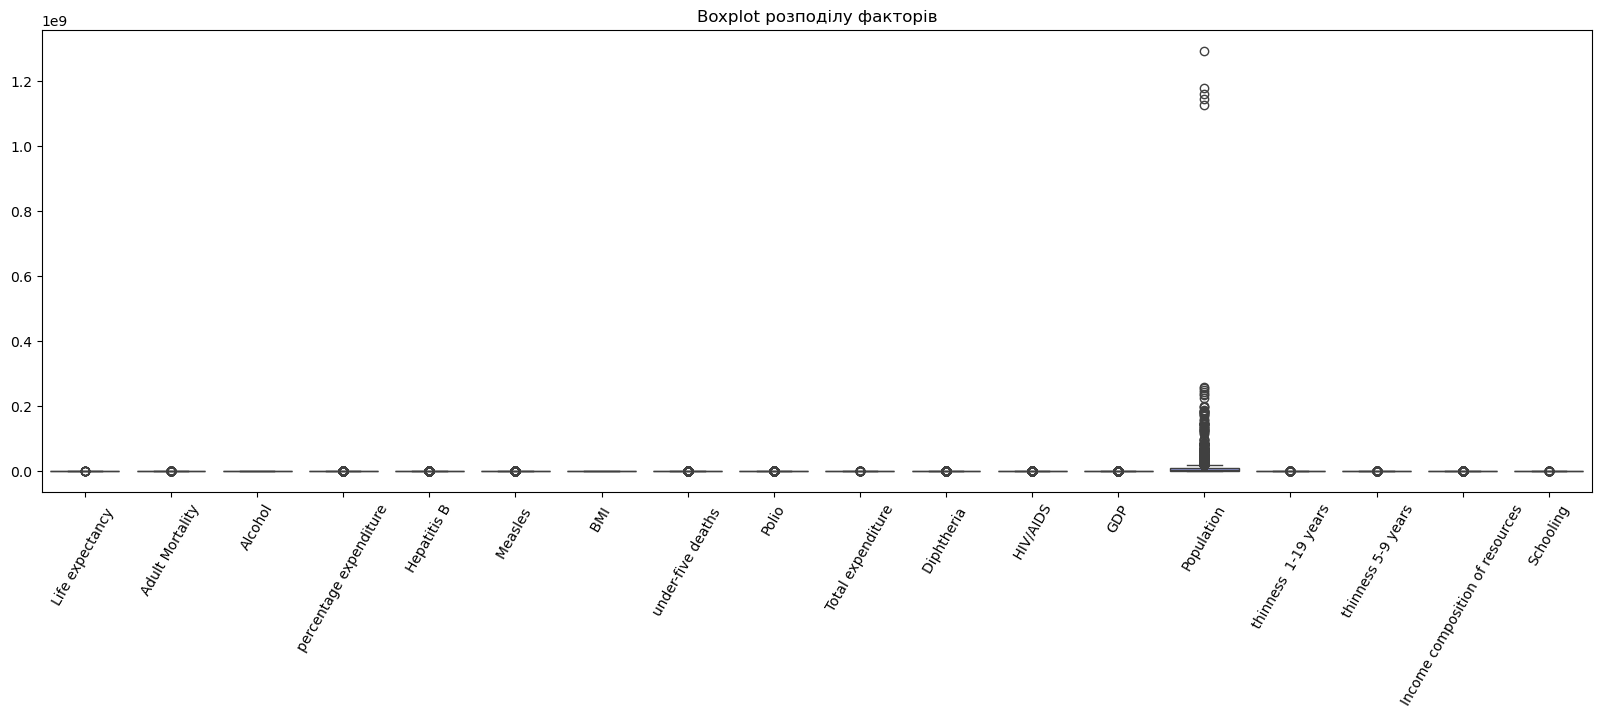

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Life Expectancy Data.csv')

#Графік розподілу факторів (histplot з rugplot)
for column in data.columns[3:]:
    plt.figure(figsize=(20, 6))
    sns.histplot(data[column], kde=True, bins=90)
    sns.rugplot(data[column], height=0.03)
    plt.title(column)
    plt.show()

data_selected = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 
                     'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 
                     'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 
                     ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
# Boxplot для візуалізації розподілу факторів
plt.figure(figsize=(20, 6))
sns.boxplot(data=data[data_selected])
plt.title('Boxplot розподілу факторів')
plt.xticks(rotation=60)
plt.show()

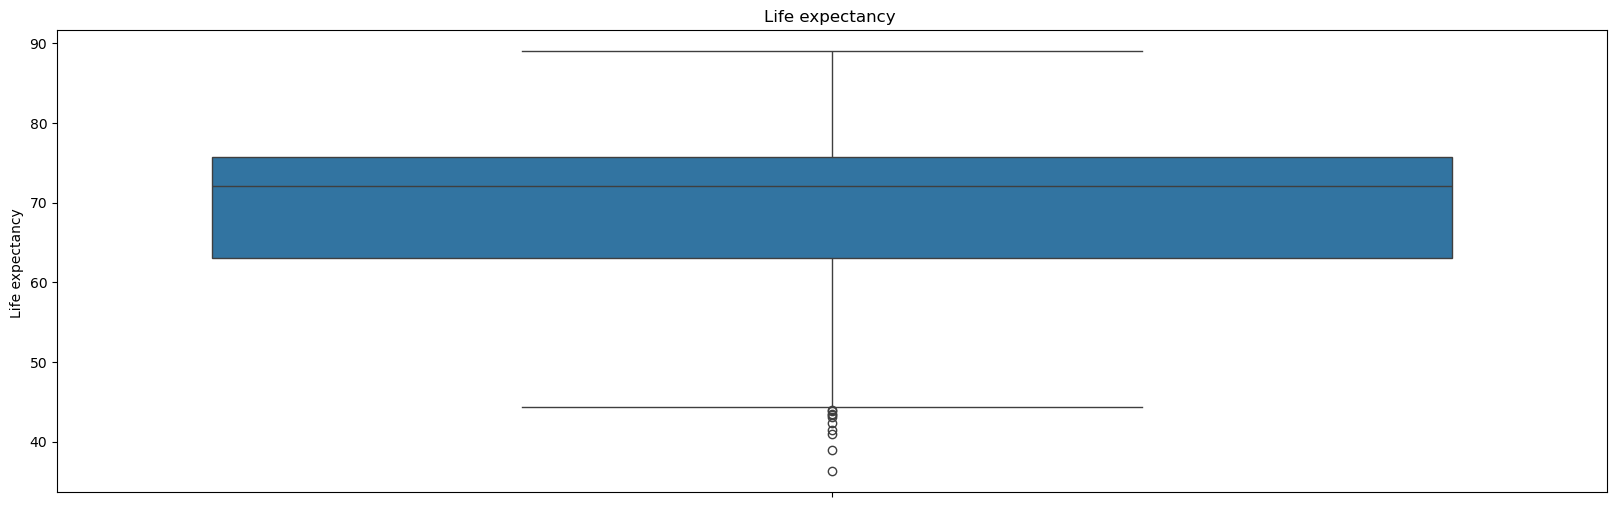

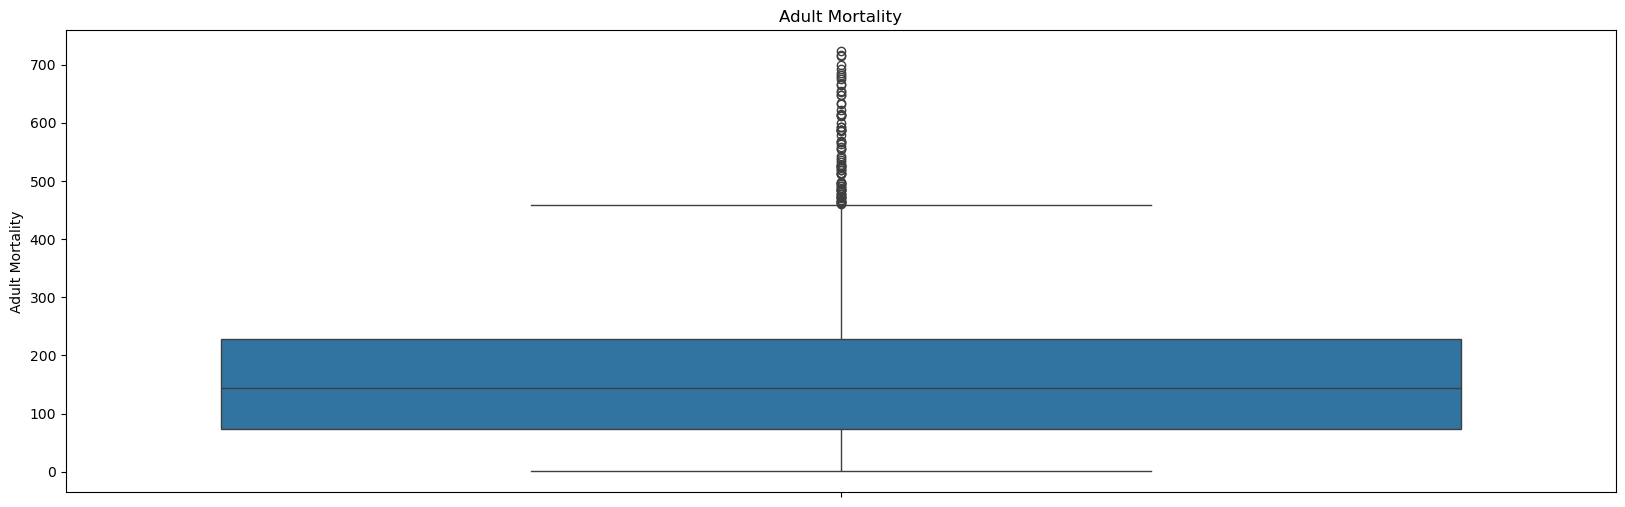

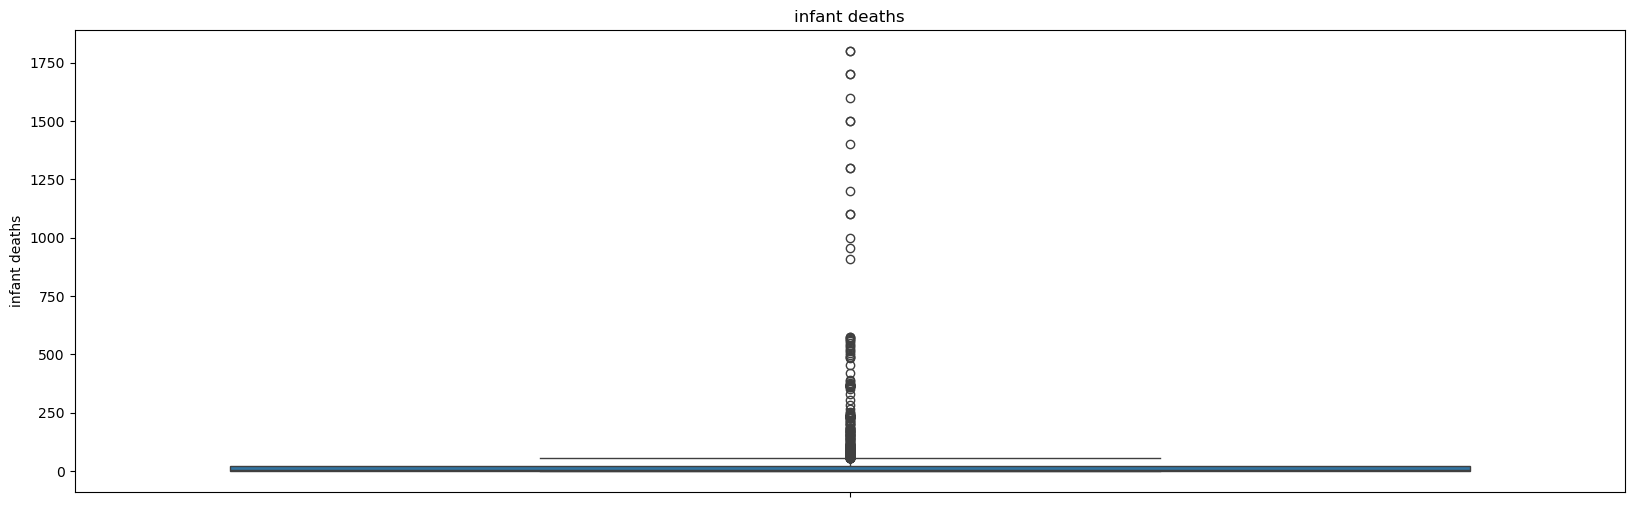

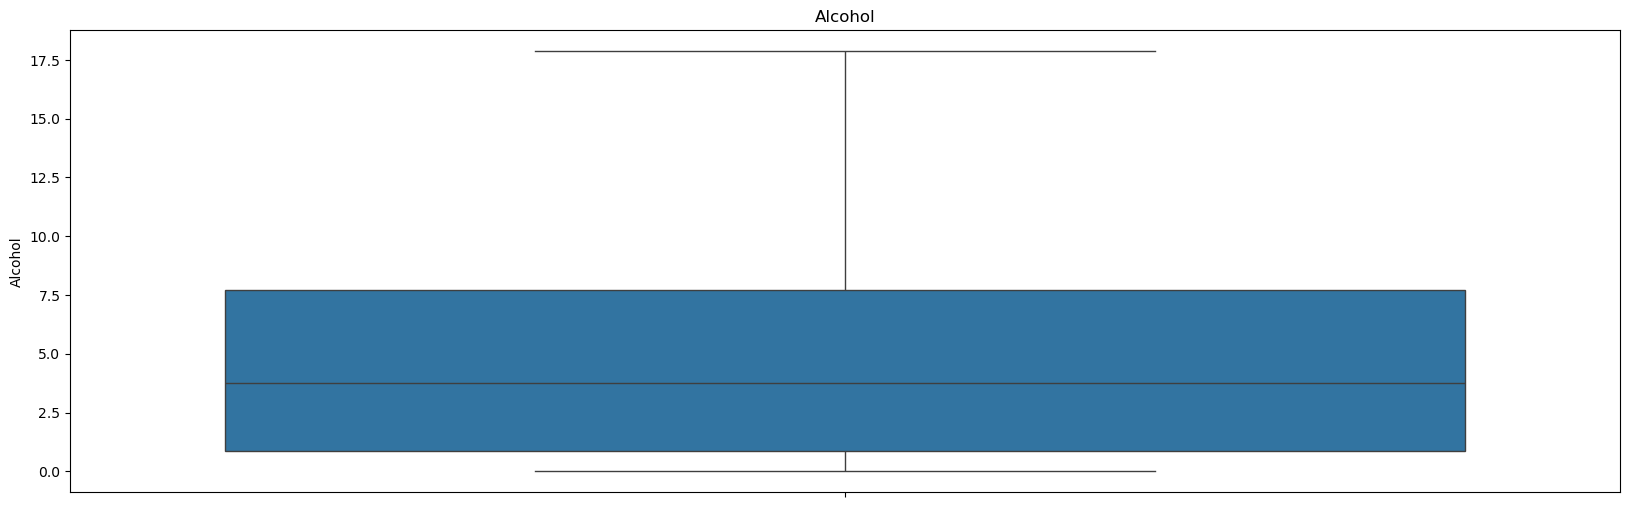

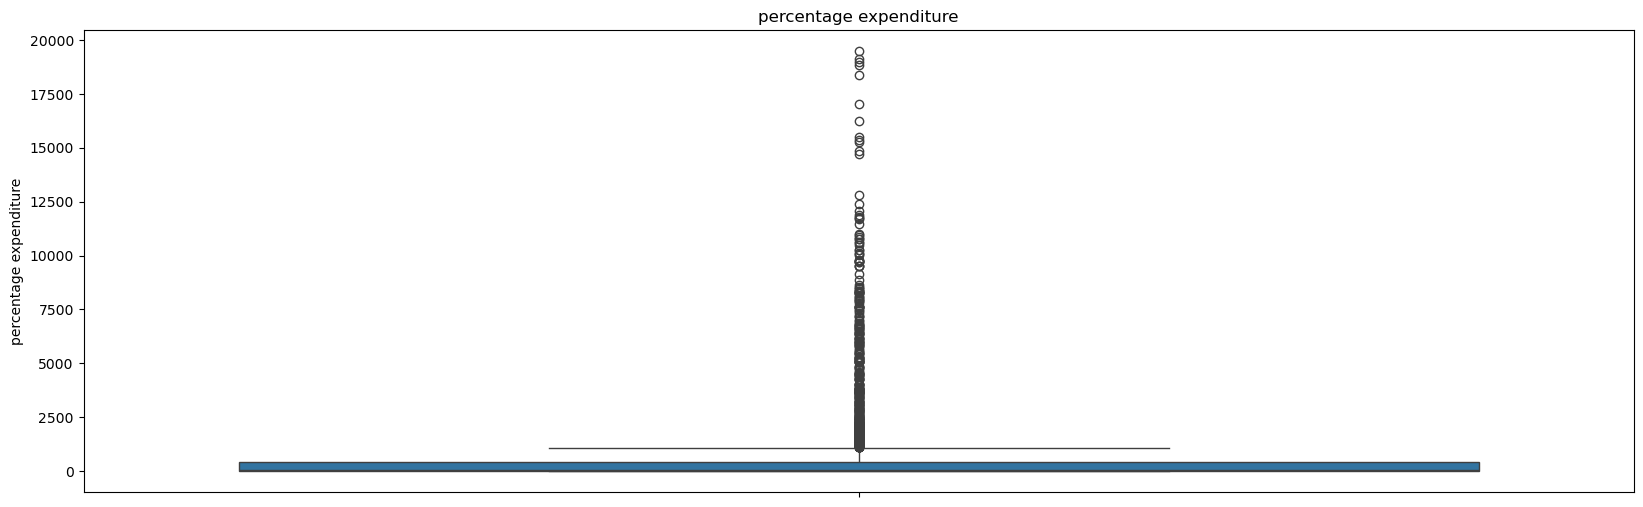

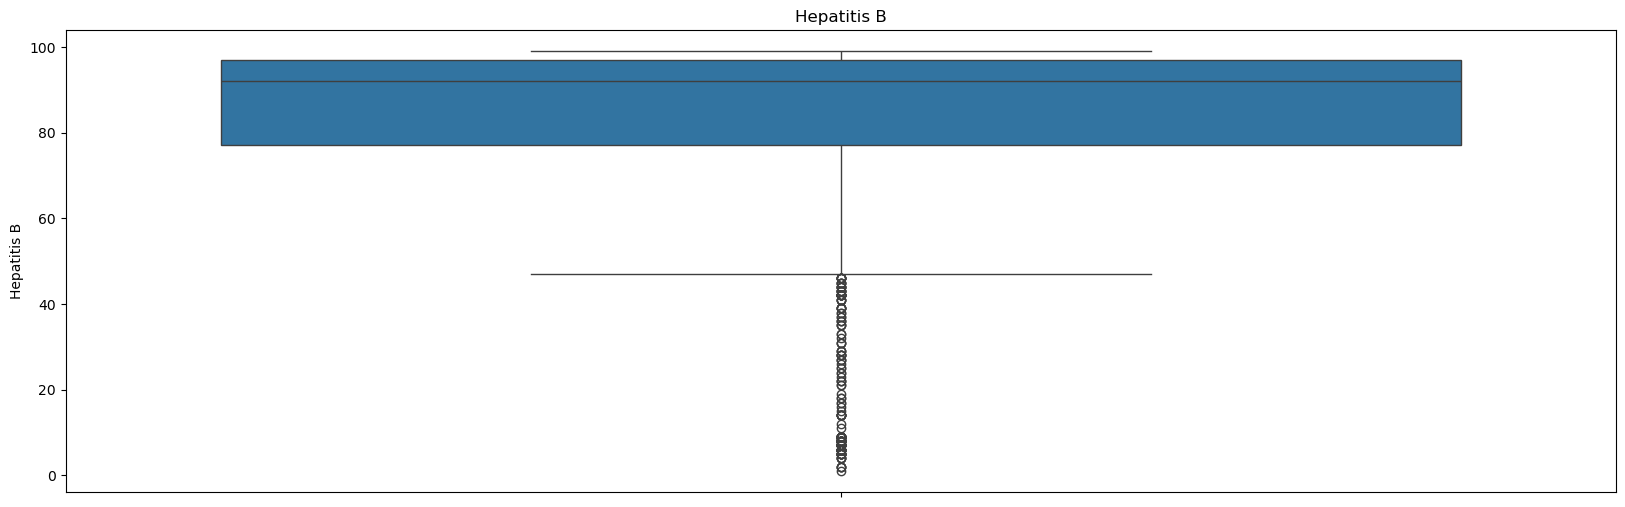

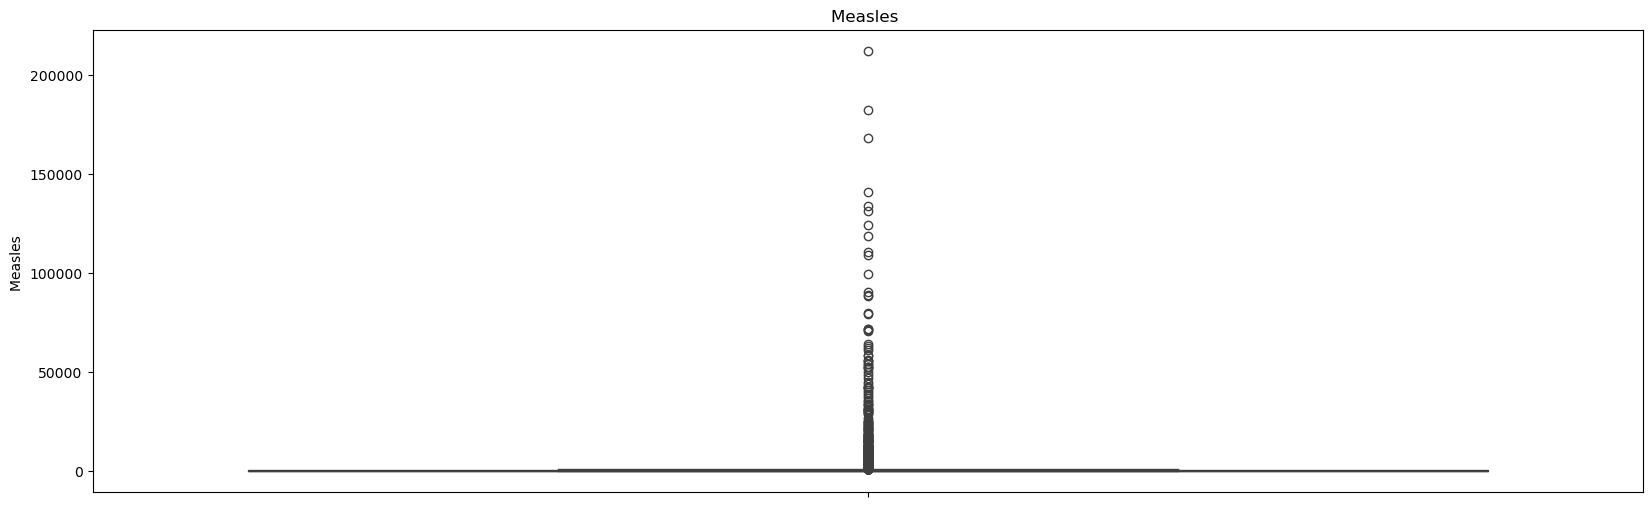

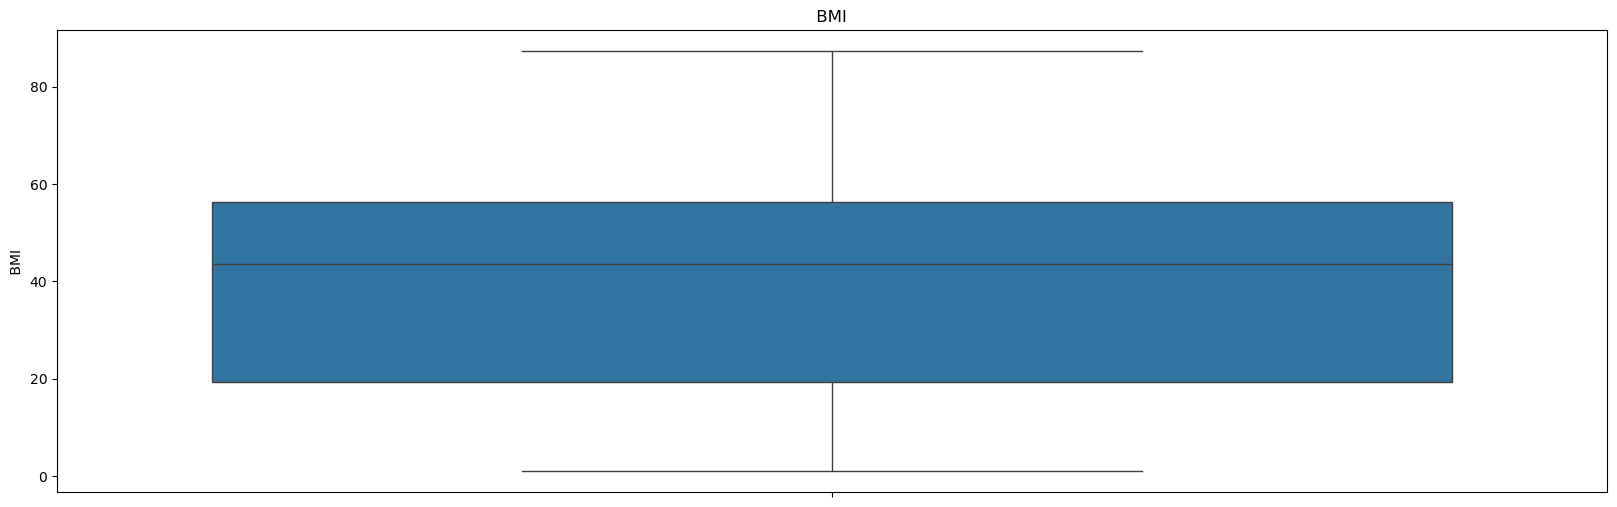

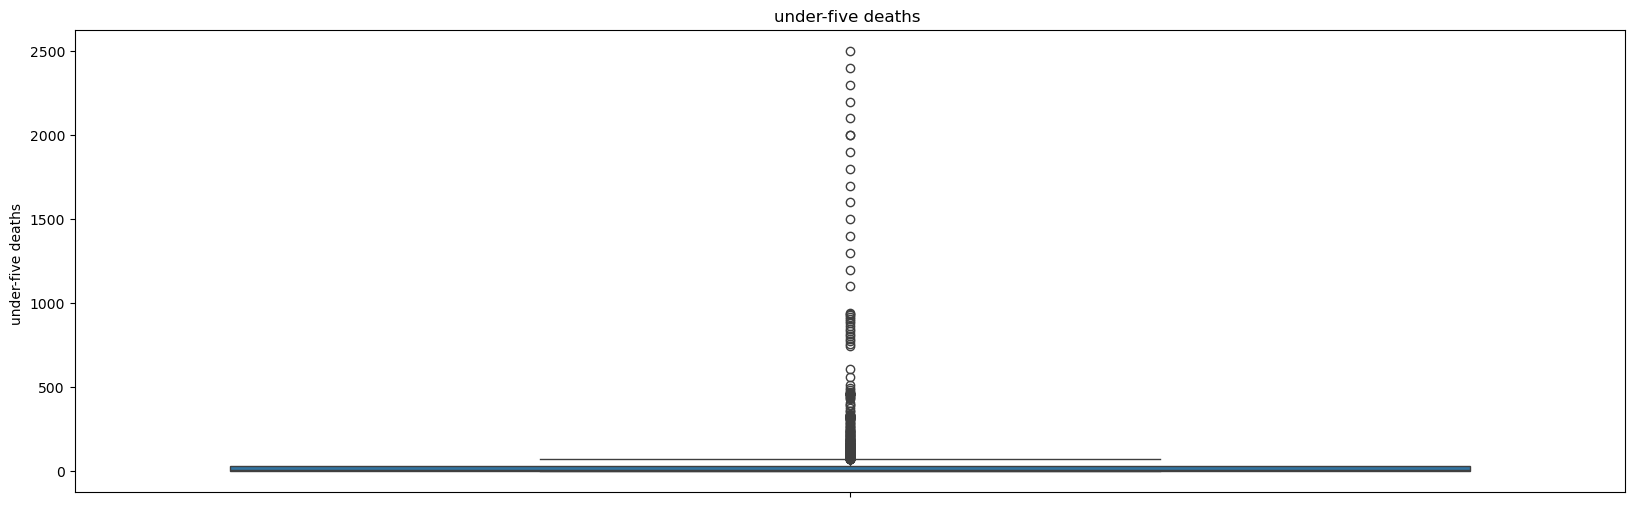

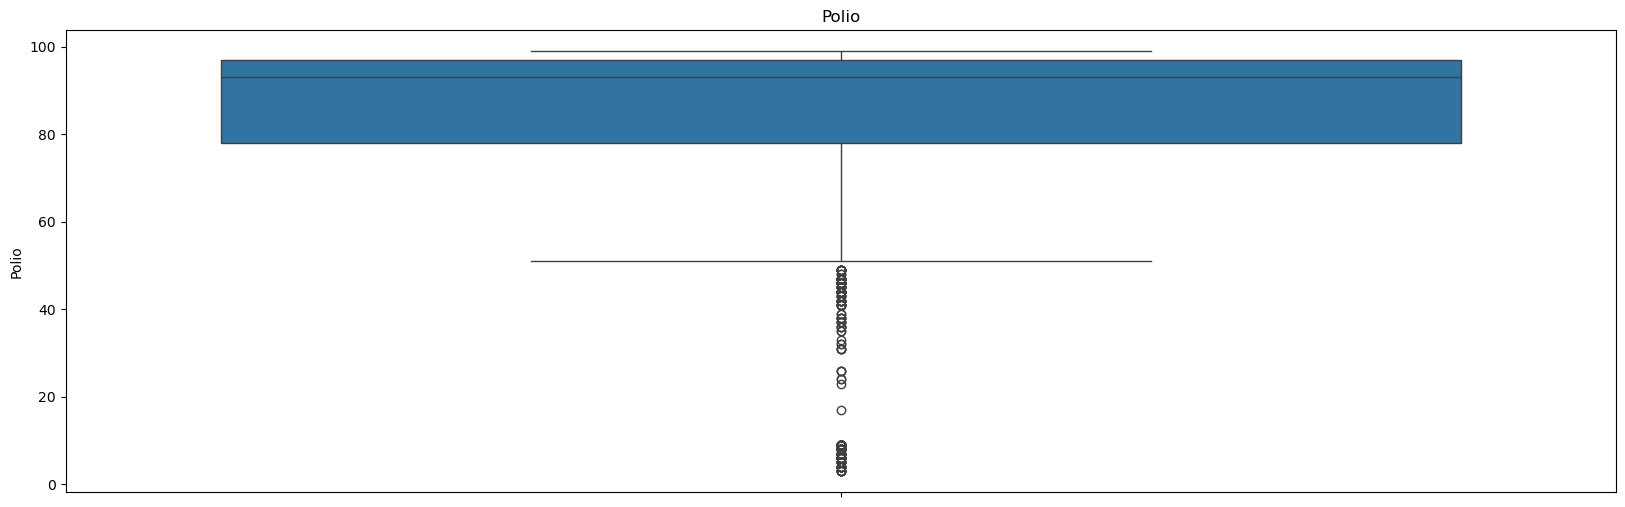

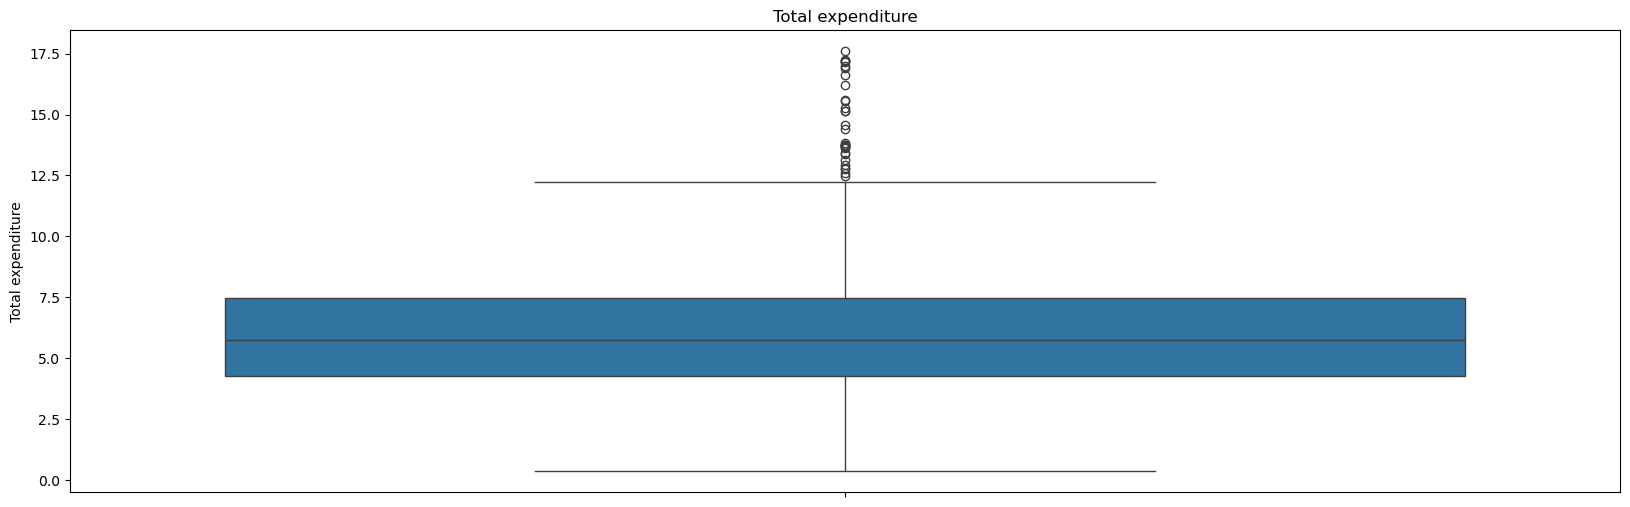

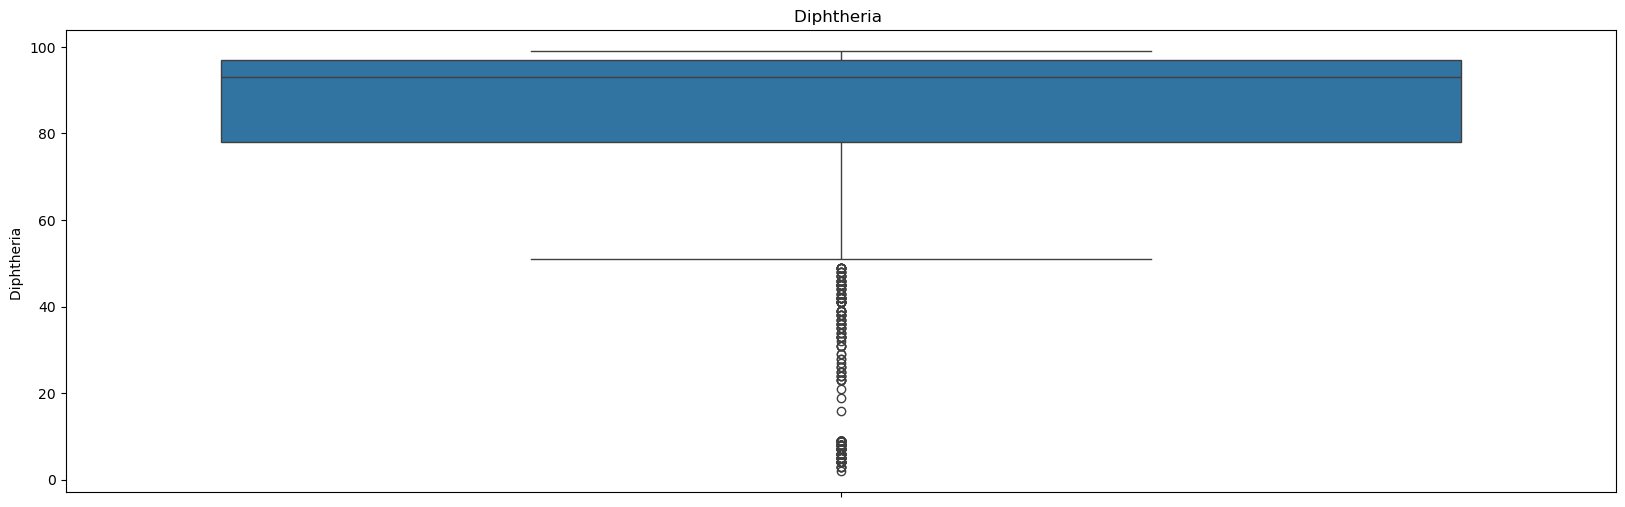

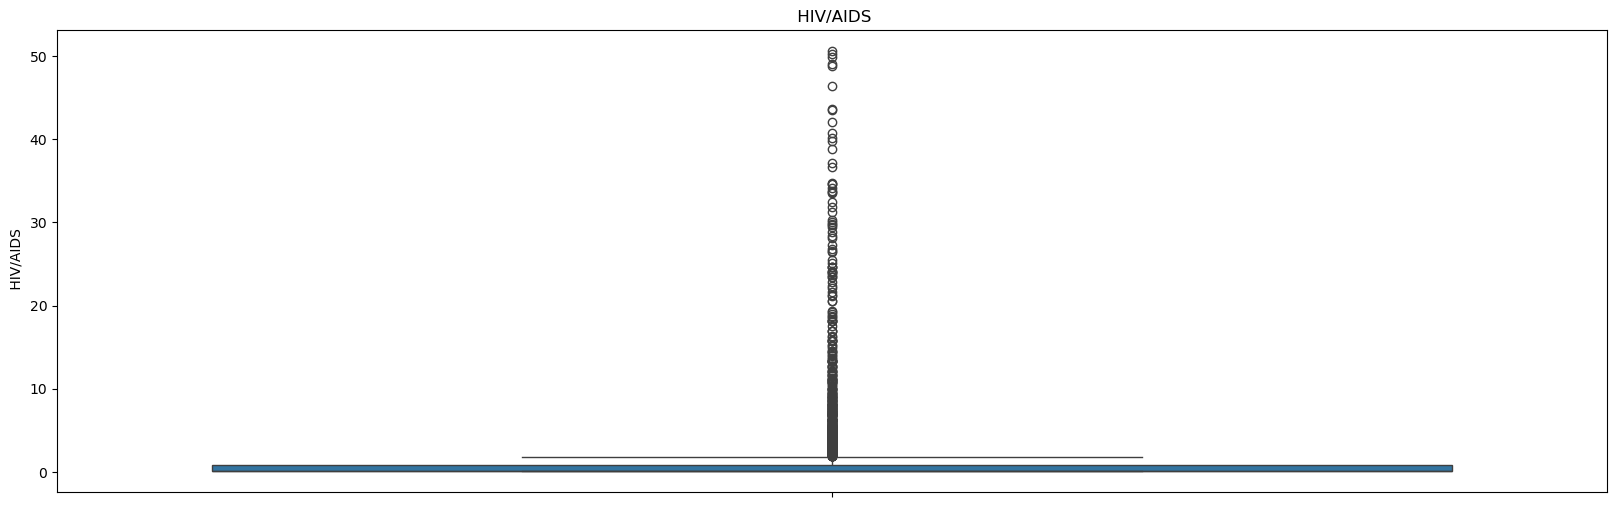

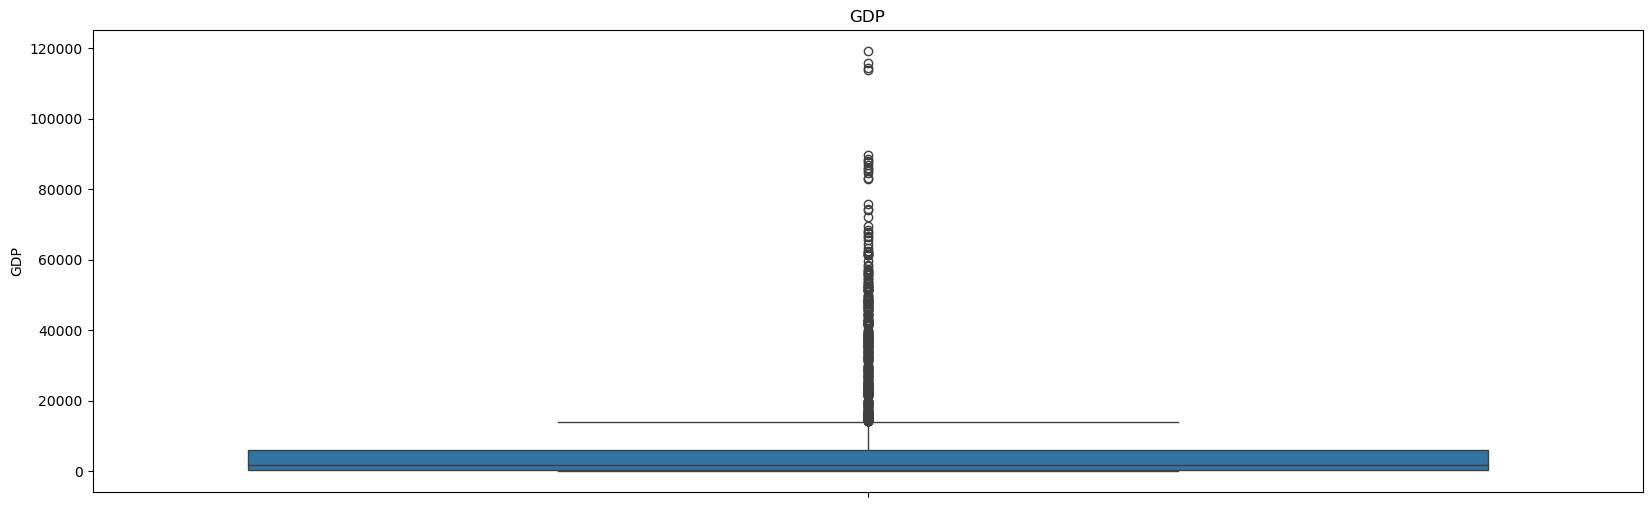

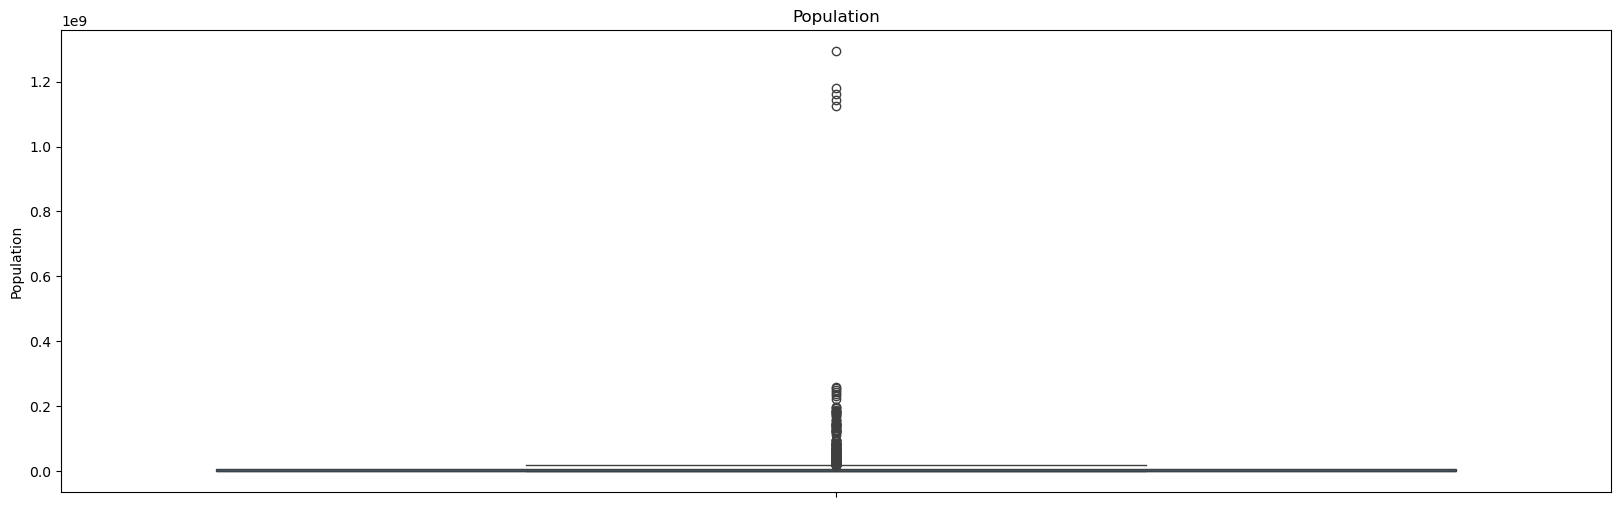

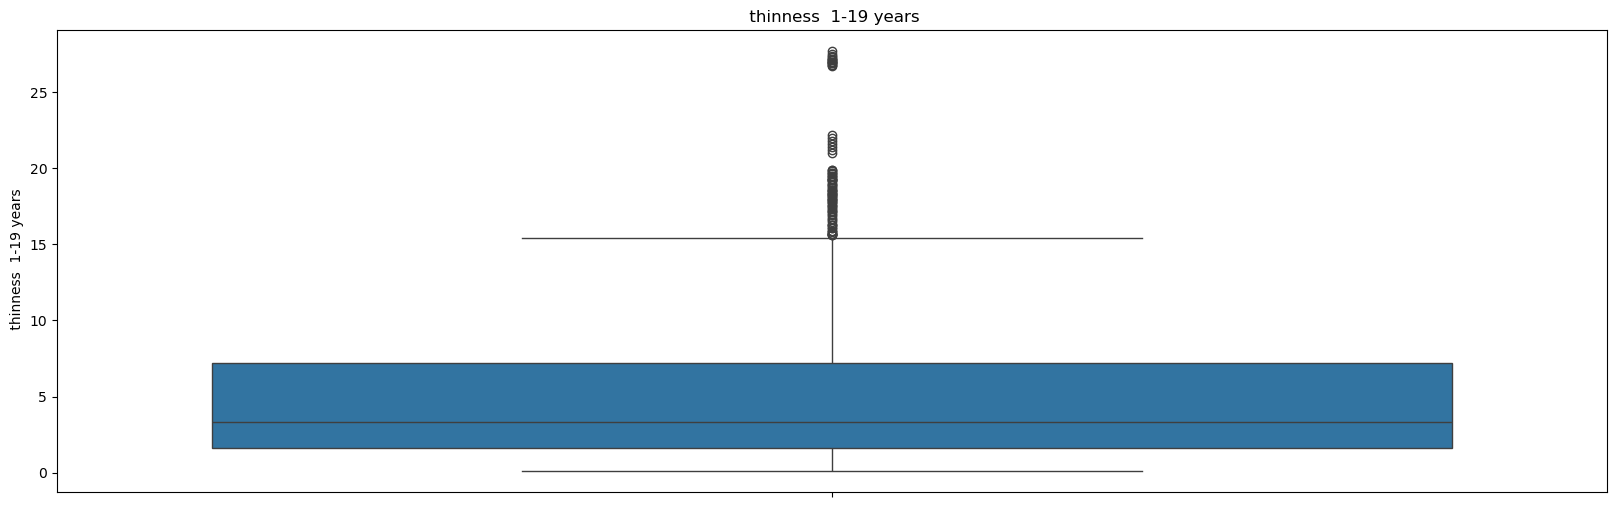

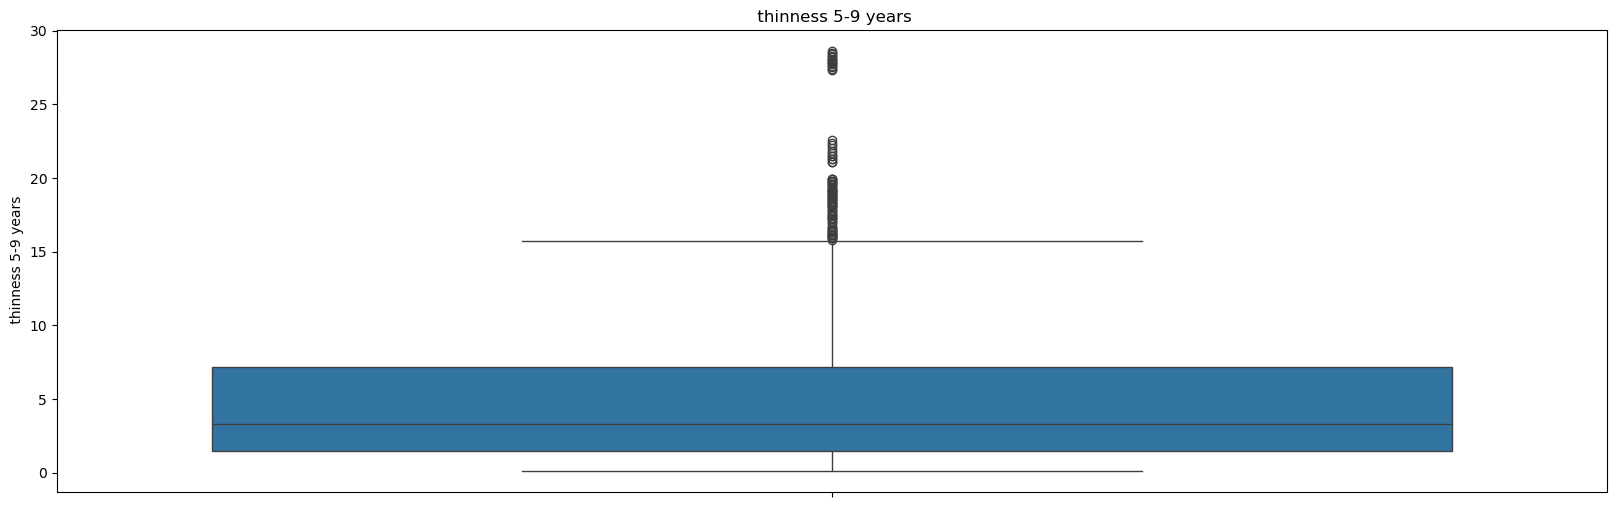

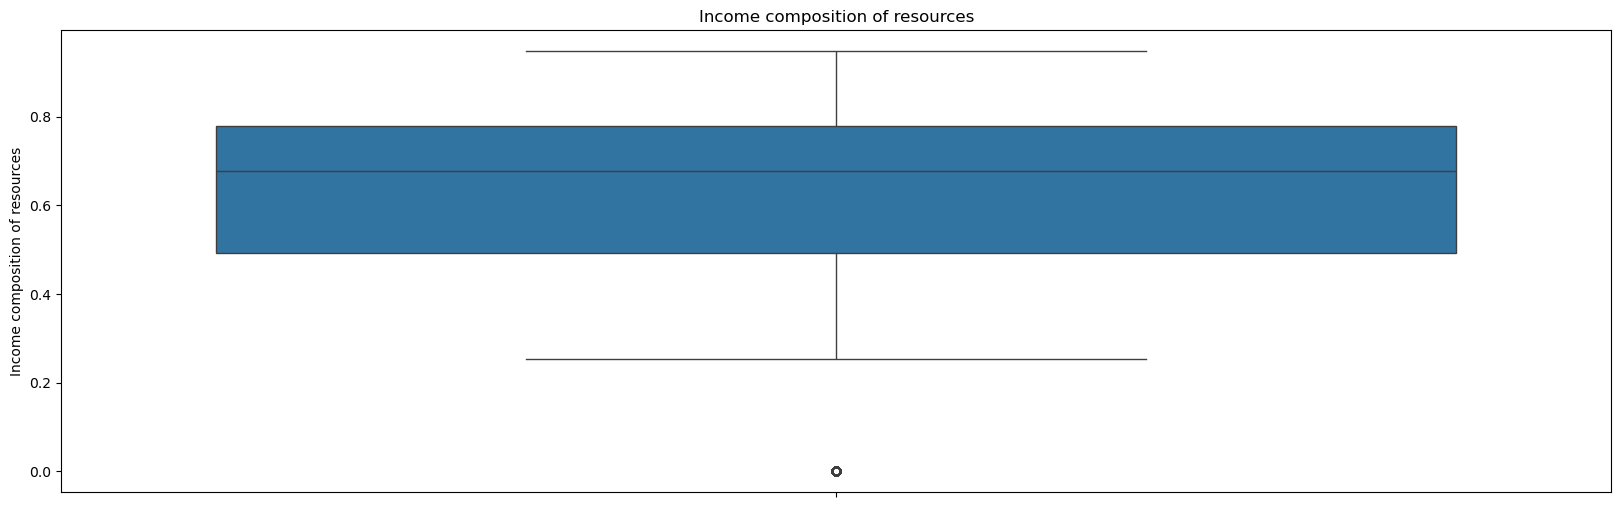

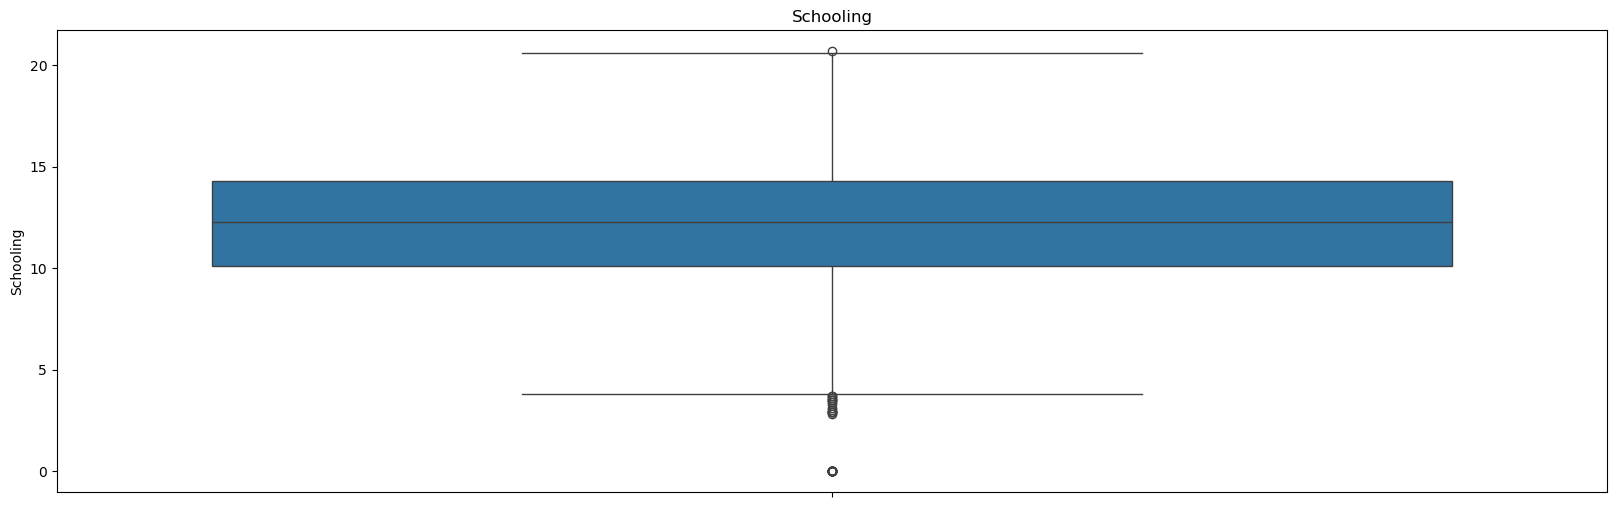

In [40]:
for column in data.columns[3:]:
    plt.figure(figsize=(20, 6))
    sns.boxplot(data=data[column])
    plt.title('Boxplot розподілу факторів')
    plt.title(column)
    plt.xticks(rotation=60)
    plt.show()

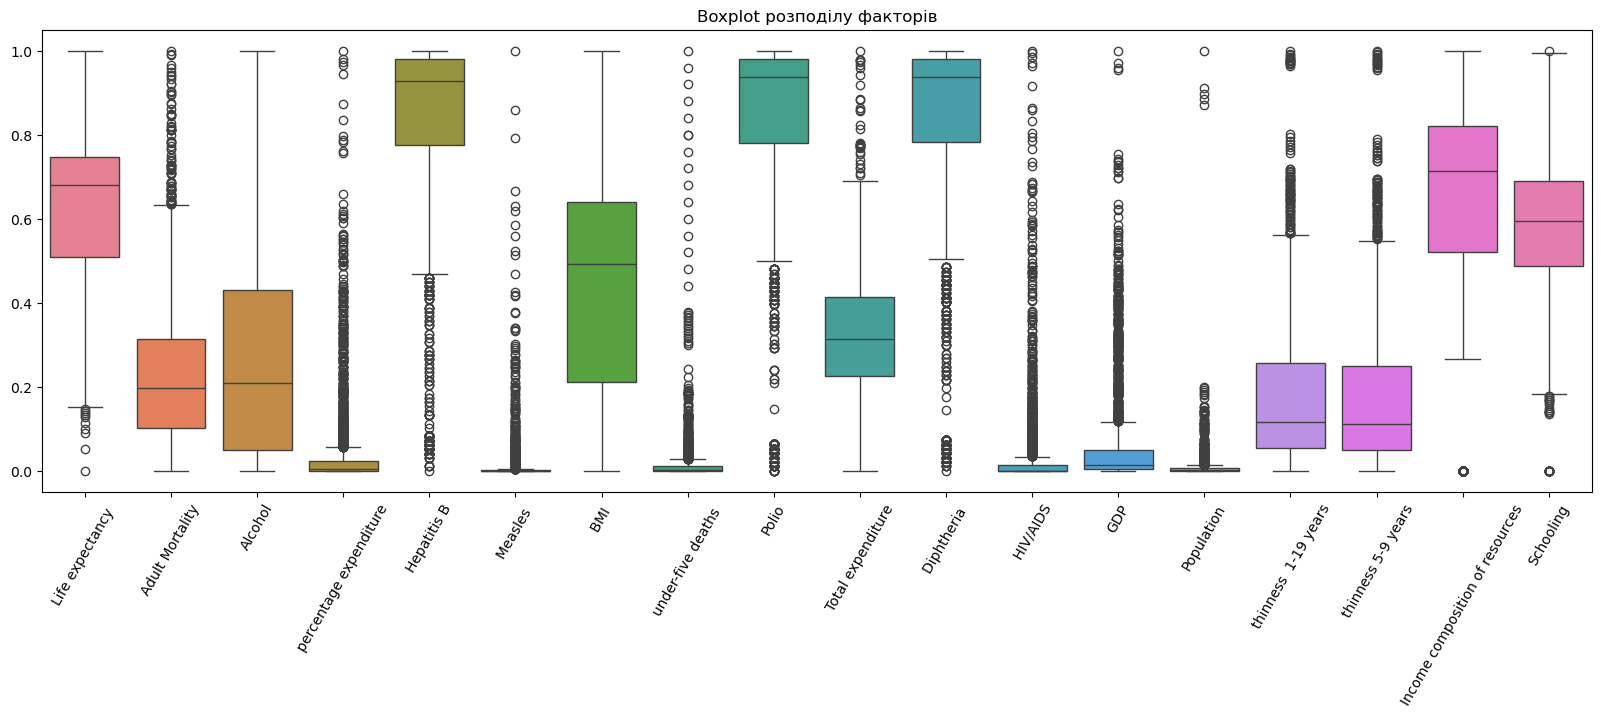

In [41]:
# Нормалізація
for column in data.columns[3:]:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

# Boxplot для візуалізації розподілу факторів
plt.figure(figsize=(20, 6))
sns.boxplot(data=data[data_selected])
plt.title('Boxplot розподілу факторів')
plt.xticks(rotation=60)
plt.show()


In [42]:
# Розрахунок дисперсії для кожного фактору
variance = data[data_selected].var()

# Розрахунок коваріації між факторами
covariance_matrix = data[data_selected].cov()

# Розрахунок кореляції між факторами
correlation_matrix = data[data_selected].corr()

# Виведення результатів
print("Дисперсія для кожного фактору:")
print(variance)
print("\nМатриця коваріації:")
print(covariance_matrix)
print("\nМатриця кореляції:")
print(correlation_matrix)

Дисперсія для кожного фактору:
Life expectancy                    0.032659
Adult Mortality                    0.029636
Alcohol                            0.051483
percentage expenditure             0.010414
Hepatitis B                        0.065442
Measles                            0.002921
 BMI                               0.053945
under-five deaths                  0.004119
Polio                              0.059557
Total expenditure                  0.021024
Diphtheria                         0.059782
 HIV/AIDS                          0.010110
GDP                                0.014339
Population                         0.002224
 thinness  1-19 years              0.025649
 thinness 5-9 years                0.025029
Income composition of resources    0.049494
Schooling                          0.026330
dtype: float64

Матриця коваріації:
                                 Life expectancy   Adult Mortality   Alcohol  \
Life expectancy                          0.032659        -0.0

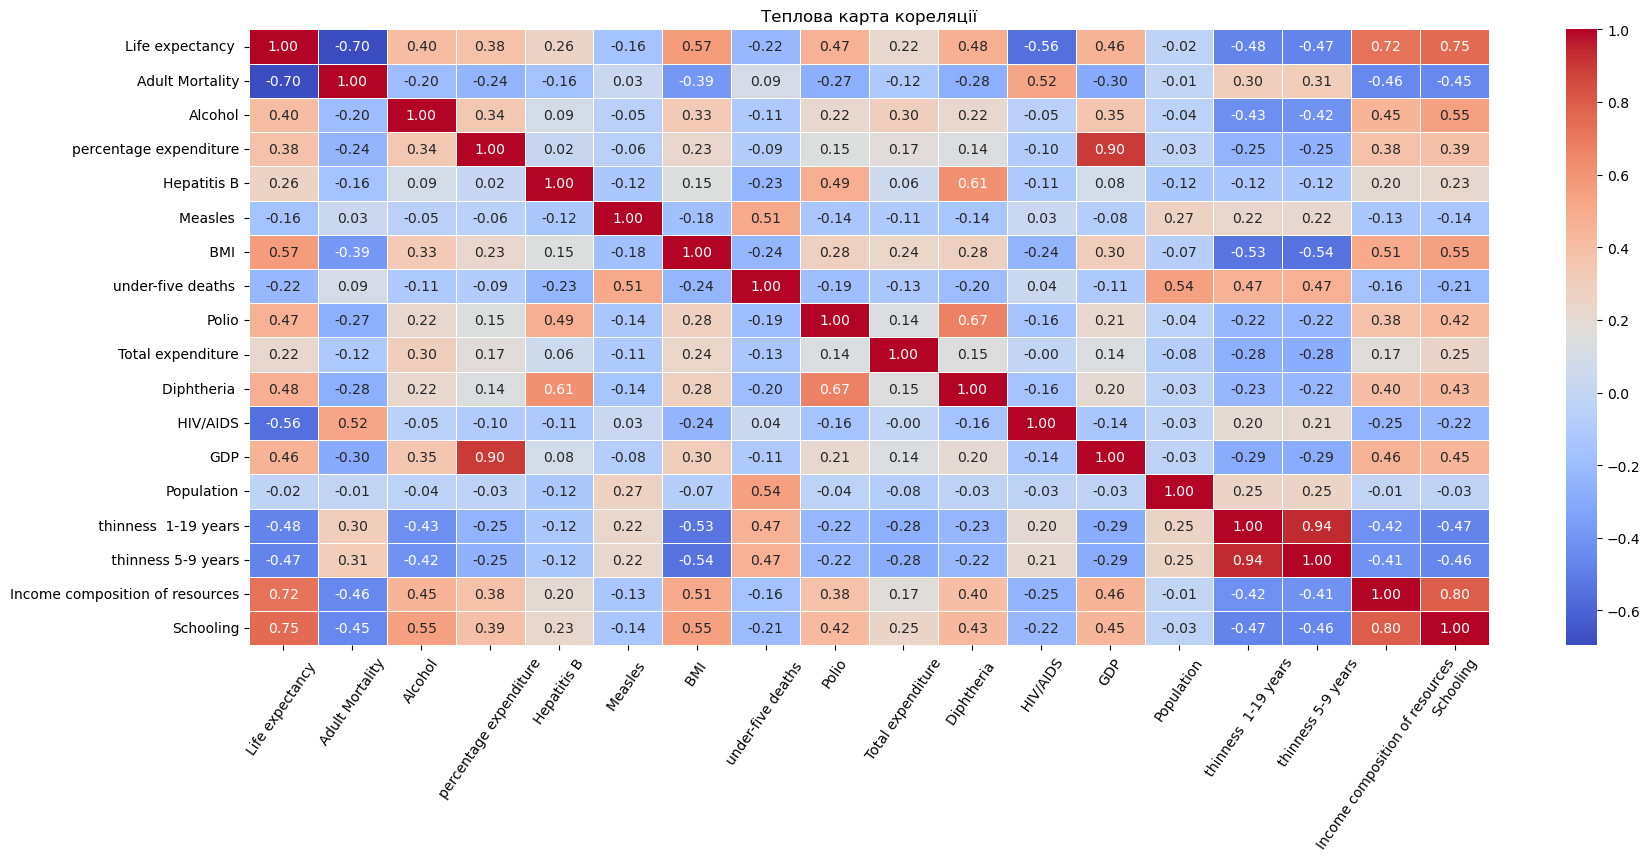

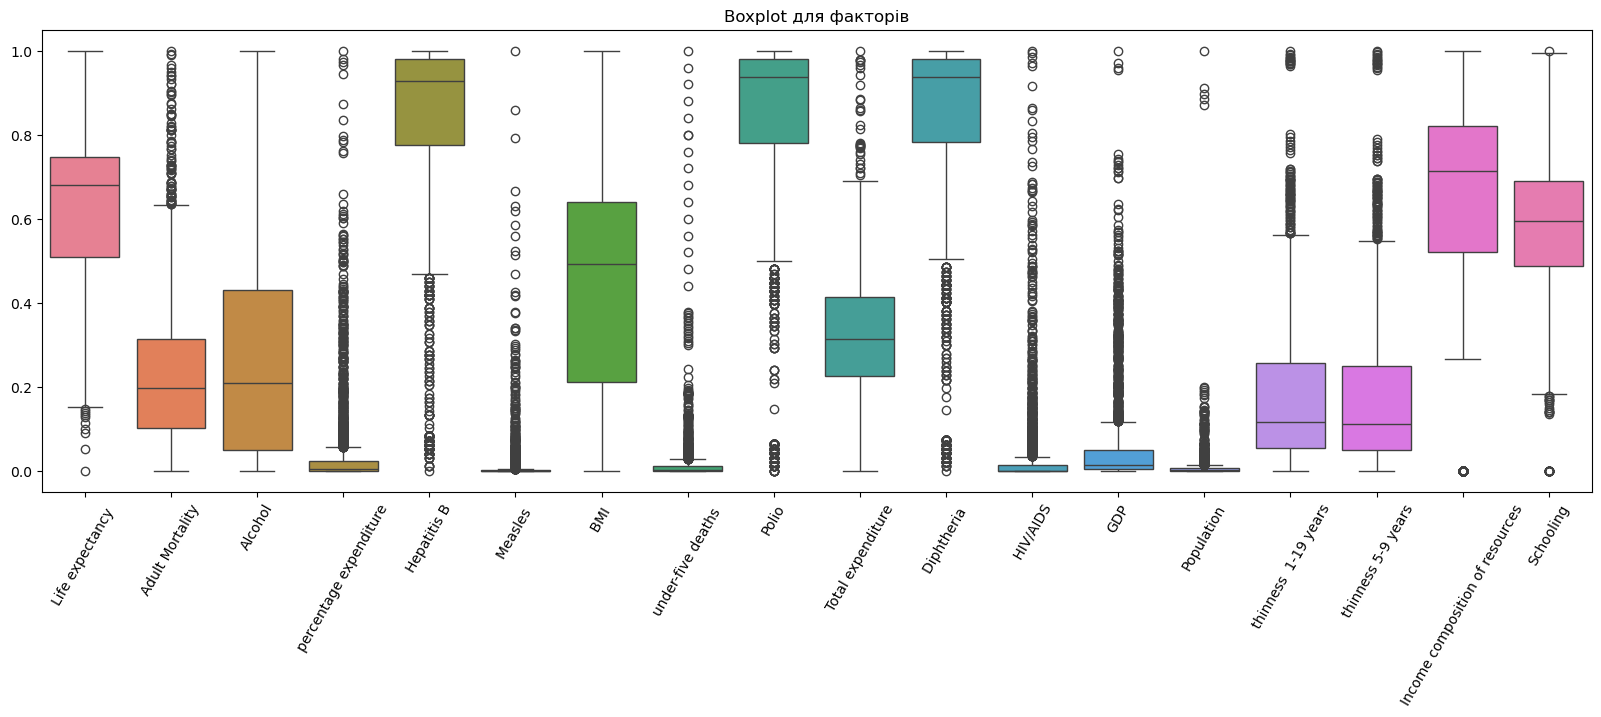

In [43]:
# карта кореляції
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Теплова карта кореляції')
plt.xticks(rotation=55)
plt.show()

# Boxplot для порівняння розподілу факторів
plt.figure(figsize=(20, 6))
sns.boxplot(data=data[data_selected])
plt.title('Boxplot для факторів')
plt.xticks(rotation=60)
plt.show()

In [44]:
# a. Чи справді різні фактори прогнозування, які були обрані спочатку, впливають на очікувану тривалість життя? Які передбачувані змінні насправді впливають на тривалість життя?

# Виведення кореляцій кожного фактора з тривалістю життя
life_expectancy_correlations = correlation_matrix['Life expectancy '].sort_values(ascending=False)
print("Кореляції з тривалістю життя:")
print(life_expectancy_correlations)

Кореляції з тривалістю життя:
Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Population                        -0.021538
Measles                           -0.157586
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


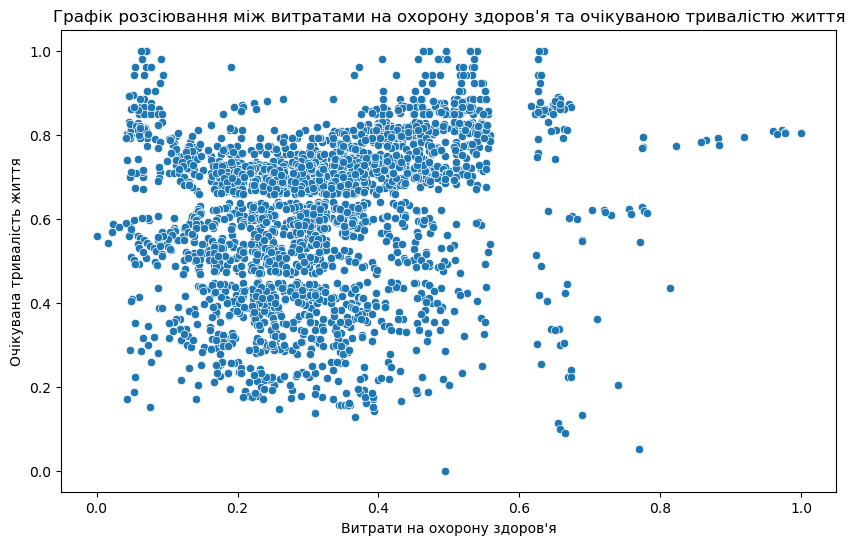

Кореляція між витратами на охорону здоров'я та очікуваною тривалістю життя: 0.21808637369167147


In [45]:
#b.	Чи повинна країна з нижчим значенням очікуваної тривалості життя (<65) збільшити витрати на охорону здоров’я, щоб покращити середню тривалість життя?

# Вибірка факторів для аналізу
selected_factors = ['Life expectancy ', 'Total expenditure']

# Вибірка необхідних факторів
selected_data = data[selected_factors]
selected_data = selected_data[selected_data['Life expectancy '] < 65]

# Побудова графіку розсіювання
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total expenditure', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між витратами на охорону здоров\'я та очікуваною тривалістю життя')
plt.xlabel('Витрати на охорону здоров\'я')
plt.ylabel('Очікувана тривалість життя')
plt.show()

# Розрахунок кореляції між витратами на охорону здоров'я та очікуваною тривалістю життя
correlation = selected_data['Total expenditure'].corr(selected_data['Life expectancy '])
print(f"Кореляція між витратами на охорону здоров'я та очікуваною тривалістю життя: {correlation}")


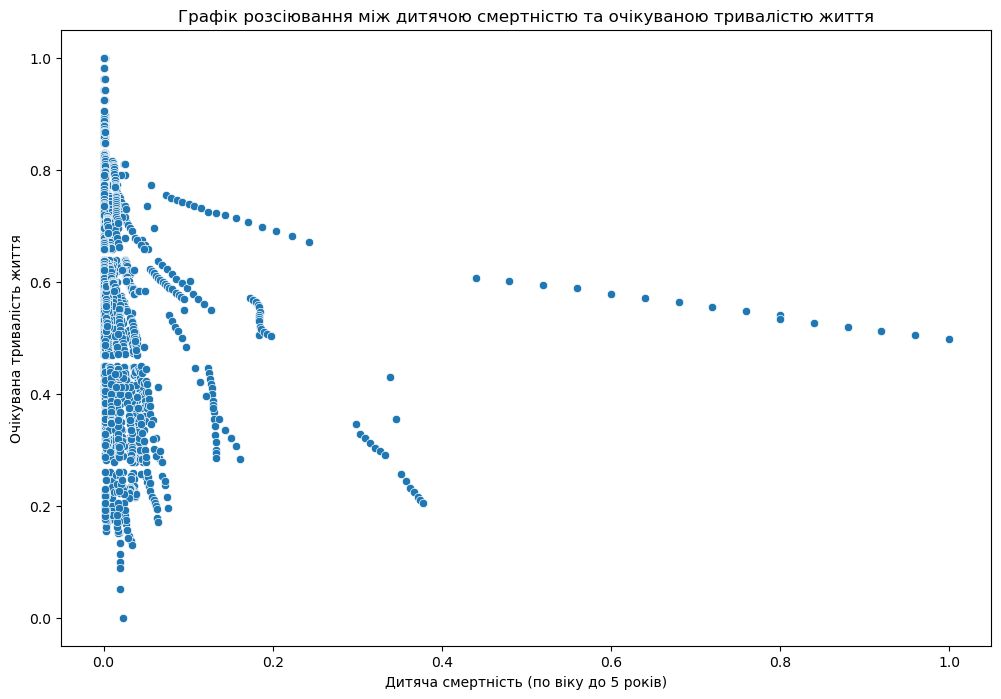

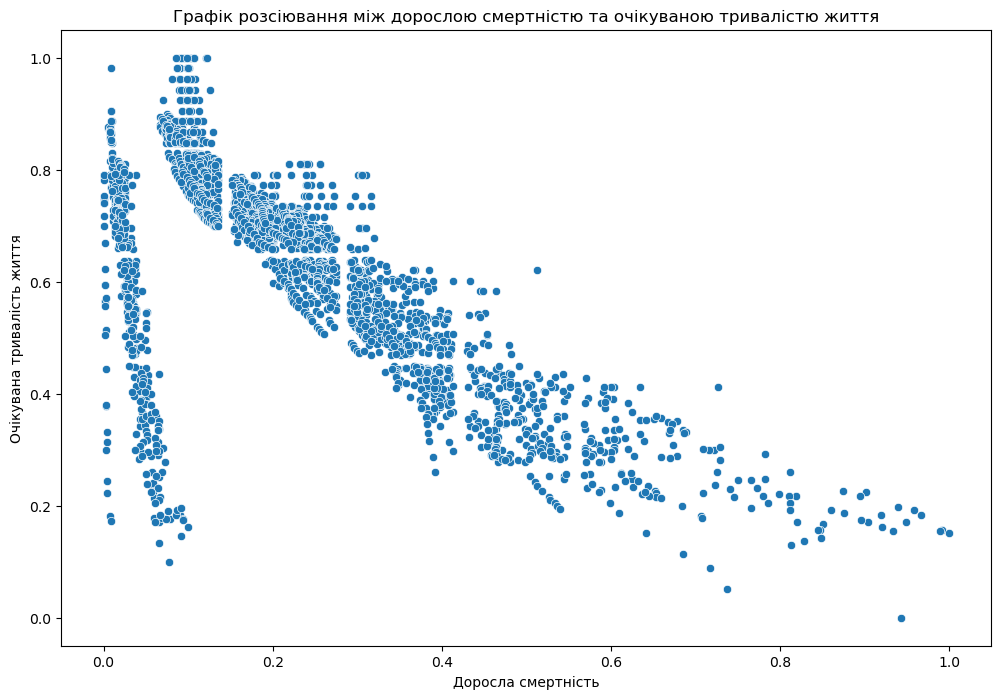

Кореляція між дитячою смертністю та очікуваною тривалістю життя: -0.22252911595117583
Кореляція між дорослою смертністю та очікуваною тривалістю життя: -0.6963593137699767


In [53]:
#c.	Як рівень дитячої та дорослої смертності впливає на тривалість життя?

# Вибірка факторів для аналізу
selected_factors = ['Life expectancy ', 'Adult Mortality', 'under-five deaths ']

# Вибірка необхідних факторів
selected_data = data[selected_factors]

# Графік розсіювання між дитячою та дорослою смертністю та очікуваною тривалістю життя
plt.figure(figsize=(12, 8))
sns.scatterplot(x='under-five deaths ', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між дитячою смертністю та очікуваною тривалістю життя')
plt.xlabel('Дитяча смертність (по віку до 5 років)')
plt.ylabel('Очікувана тривалість життя')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між дорослою смертністю та очікуваною тривалістю життя')
plt.xlabel('Доросла смертність')
plt.ylabel('Очікувана тривалість життя')
plt.show()

# Розрахунок кореляції між смертністю та очікуваною тривалістю життя
under_five_deaths_correlation = selected_data['under-five deaths '].corr(selected_data['Life expectancy '])
adult_mortality_correlation = selected_data['Adult Mortality'].corr(selected_data['Life expectancy '])

print(f"Кореляція між дитячою смертністю та очікуваною тривалістю життя: {under_five_deaths_correlation}")
print(f"Кореляція між дорослою смертністю та очікуваною тривалістю життя: {adult_mortality_correlation}")


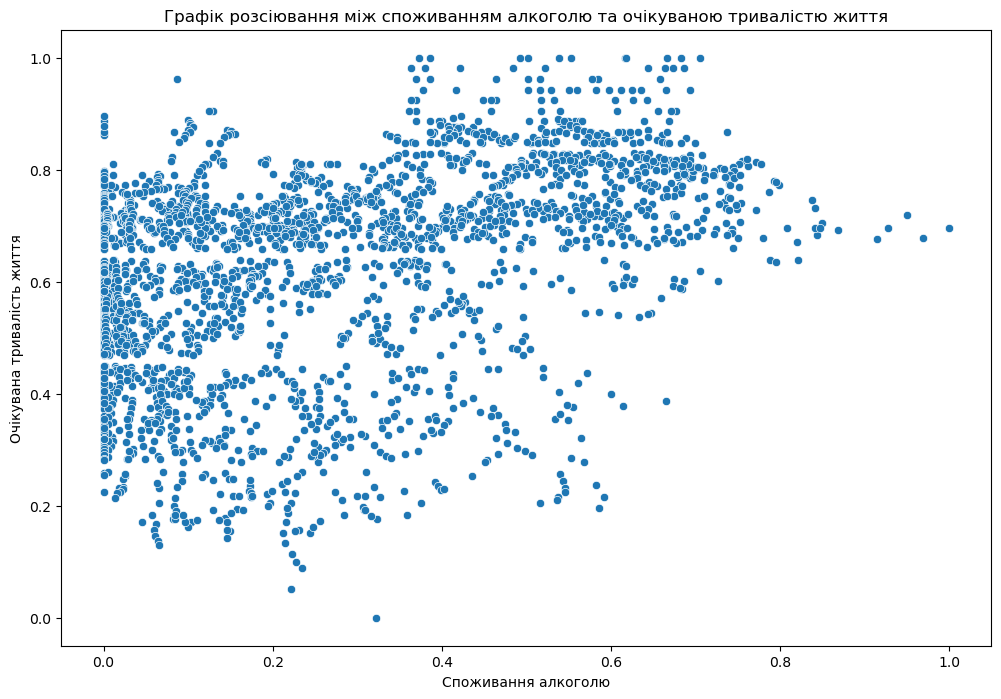

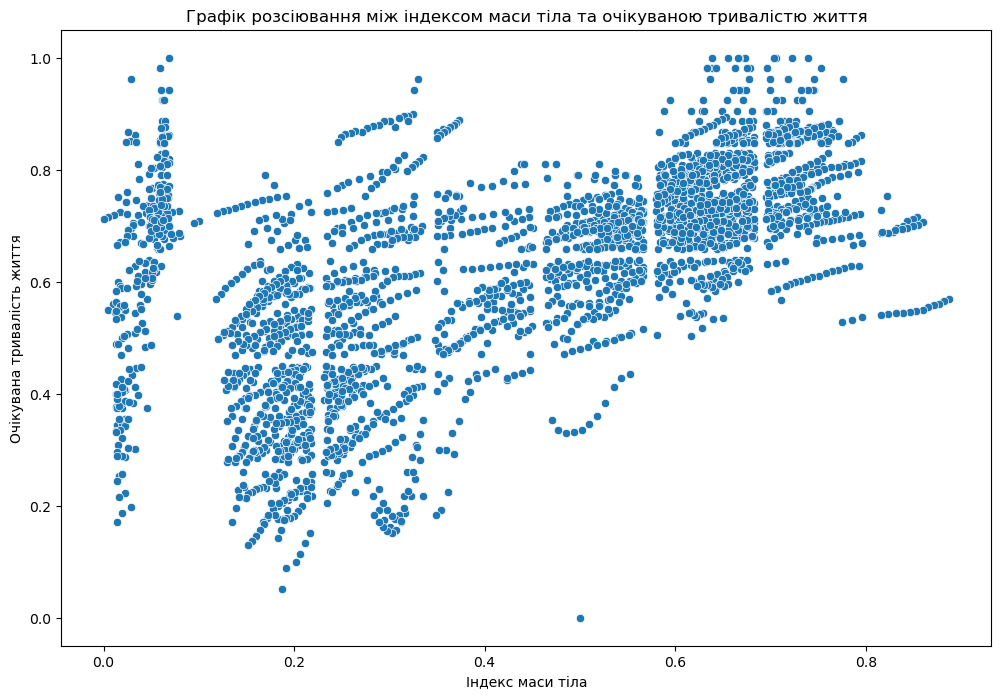

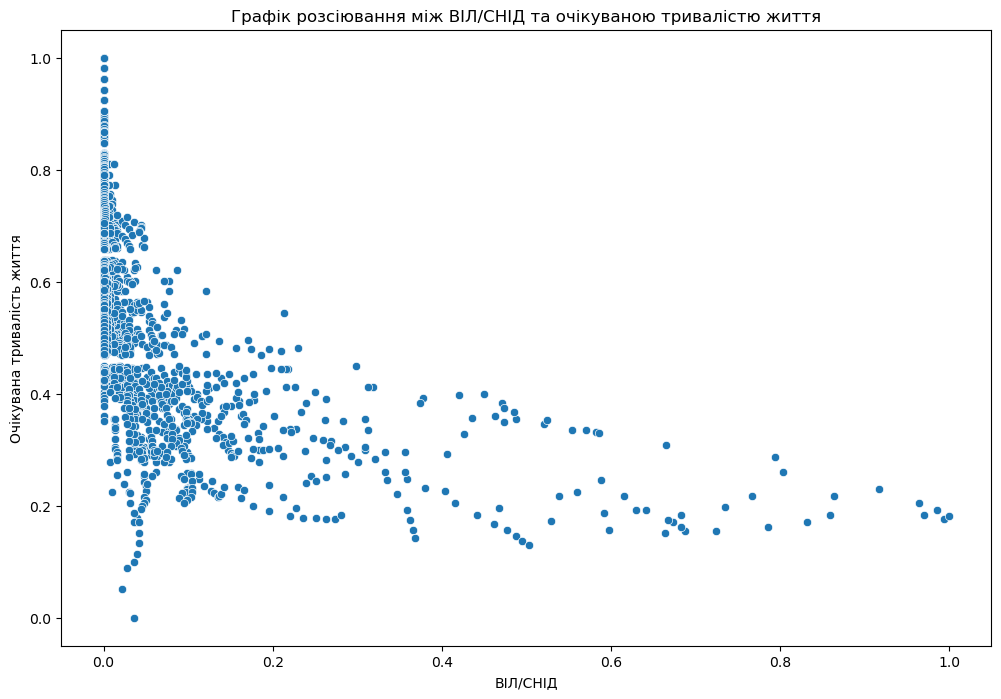

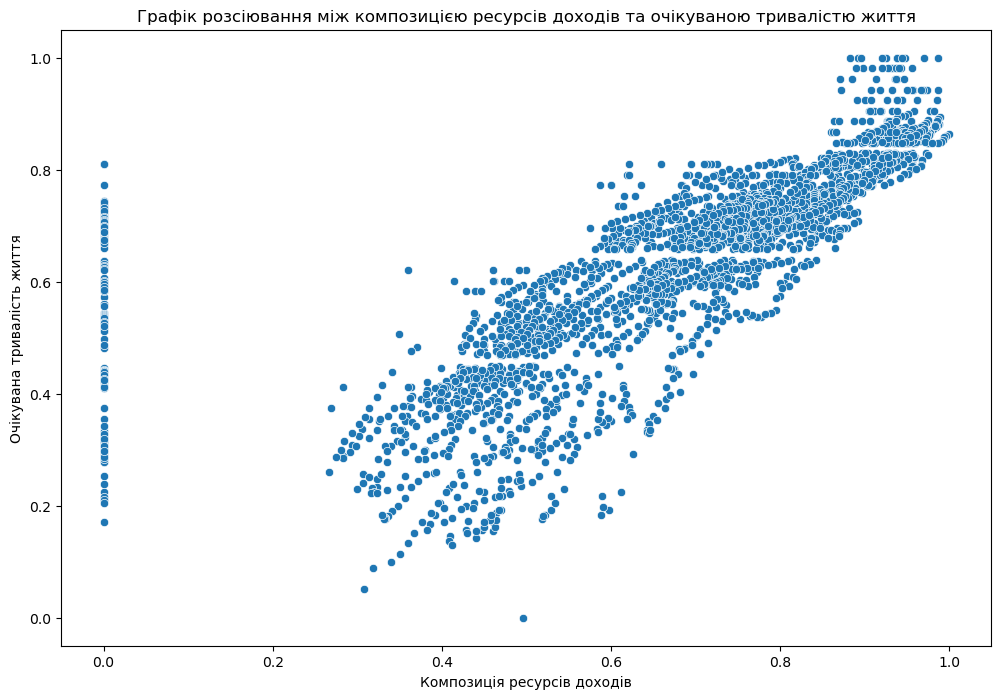

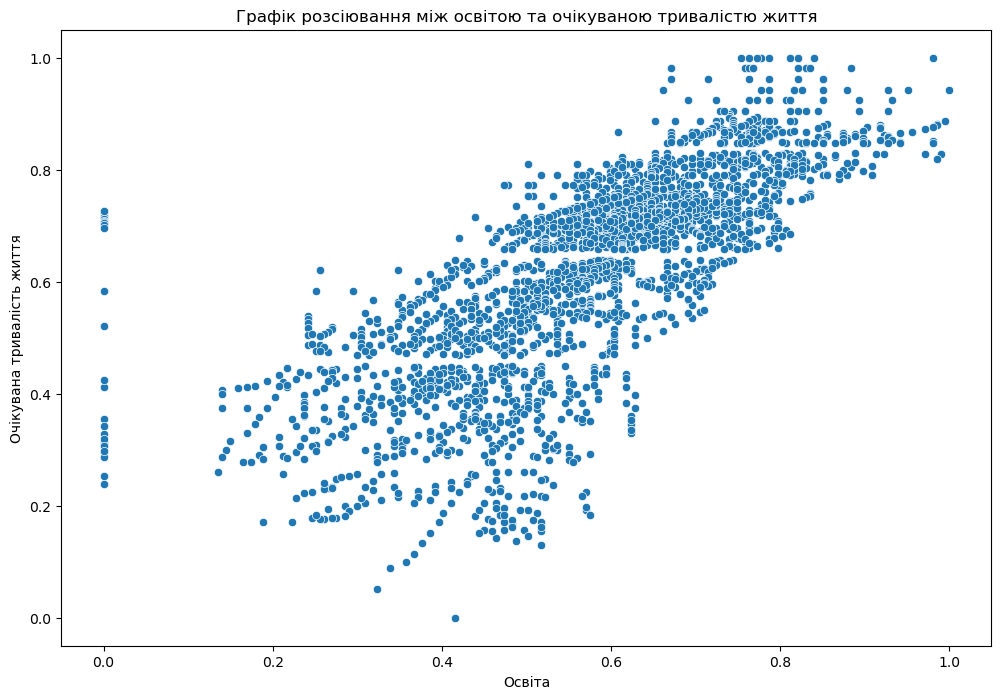

Кореляція між споживанням алкоголю та очікуваною тривалістю життя: 0.40487676112660226
Кореляція між індексом маси тіла (BMI) та очікуваною тривалістю життя: 0.5676935475459862
Кореляція між ВІЛ/СНІД (HIV/AIDS) та очікуваною тривалістю життя: -0.5565562534006936
Кореляція між композицією ресурсів доходів та очікуваною тривалістю життя: 0.7247759785960612
Кореляція між освітою та очікуваною тривалістю життя: 0.7519754627366982


In [47]:
#d.	Чи має очікувана тривалість життя позитивну чи негативну кореляцію зі звичками в їжі, способом життя, фізичними вправами, курінням, вживанням алкоголю тощо.

# Вибірка факторів для аналізу
selected_factors = ['Life expectancy ', 'Alcohol', ' BMI ', ' HIV/AIDS', 'Income composition of resources', 'Schooling']

# Вибірка необхідних факторів
selected_data = data[selected_factors]

# Графік розсіювання між різними факторами та очікуваною тривалістю життя
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Alcohol', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між споживанням алкоголю та очікуваною тривалістю життя')
plt.xlabel('Споживання алкоголю')
plt.ylabel('Очікувана тривалість життя')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x=' BMI ', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між індексом маси тіла та очікуваною тривалістю життя')
plt.xlabel('Індекс маси тіла')
plt.ylabel('Очікувана тривалість життя')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x=' HIV/AIDS', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між ВІЛ/СНІД та очікуваною тривалістю життя')
plt.xlabel('ВІЛ/СНІД')
plt.ylabel('Очікувана тривалість життя')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income composition of resources', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між композицією ресурсів доходів та очікуваною тривалістю життя')
plt.xlabel('Композиція ресурсів доходів')
plt.ylabel('Очікувана тривалість життя')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Schooling', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між освітою та очікуваною тривалістю життя')
plt.xlabel('Освіта')
plt.ylabel('Очікувана тривалість життя')
plt.show()

# Розрахунок кореляції між факторами та очікуваною тривалістю життя
alcohol_correlation = selected_data['Alcohol'].corr(selected_data['Life expectancy '])
bmi_correlation = selected_data[' BMI '].corr(selected_data['Life expectancy '])
hiv_correlation = selected_data[' HIV/AIDS'].corr(selected_data['Life expectancy '])
income_correlation = selected_data['Income composition of resources'].corr(selected_data['Life expectancy '])
schooling_correlation = selected_data['Schooling'].corr(selected_data['Life expectancy '])

print(f"Кореляція між споживанням алкоголю та очікуваною тривалістю життя: {alcohol_correlation}")
print(f"Кореляція між індексом маси тіла (BMI) та очікуваною тривалістю життя: {bmi_correlation}")
print(f"Кореляція між ВІЛ/СНІД (HIV/AIDS) та очікуваною тривалістю життя: {hiv_correlation}")
print(f"Кореляція між композицією ресурсів доходів та очікуваною тривалістю життя: {income_correlation}")
print(f"Кореляція між освітою та очікуваною тривалістю життя: {schooling_correlation}")


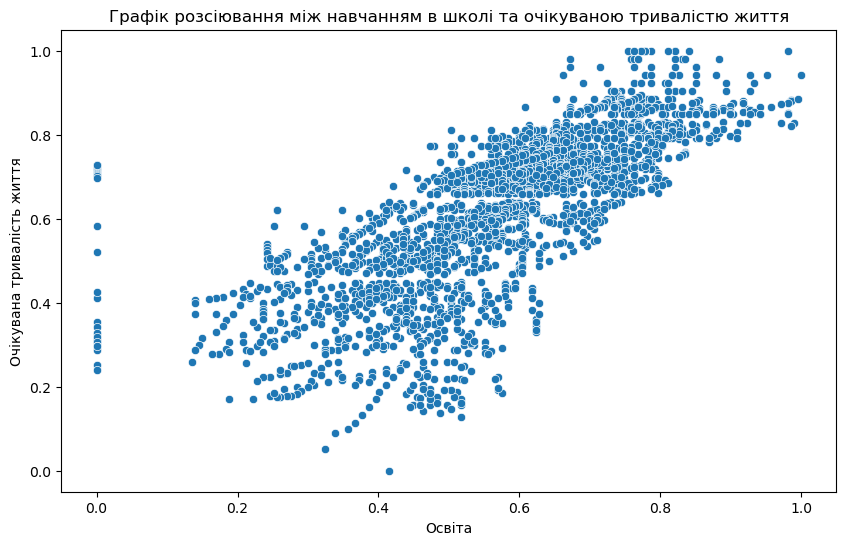

Кореляція між навчанням в школі та очікуваною тривалістю життя: 0.7519754627366982


In [54]:
#e.	Який вплив навчання в школі на тривалість життя людини?

# Вибірка факторів для аналізу
selected_factors = ['Life expectancy ', 'Schooling']

# Вибірка необхідних факторів
selected_data = data[selected_factors]

# Графік розсіювання між навчанням в школі та очікуваною тривалістю життя
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між навчанням в школі та очікуваною тривалістю життя')
plt.xlabel('Освіта')
plt.ylabel('Очікувана тривалість життя')
plt.show()

# Розрахунок кореляції між навчанням в школі та очікуваною тривалістю життя
schooling_correlation = selected_data['Schooling'].corr(selected_data['Life expectancy '])
print(f"Кореляція між навчанням в школі та очікуваною тривалістю життя: {schooling_correlation}")


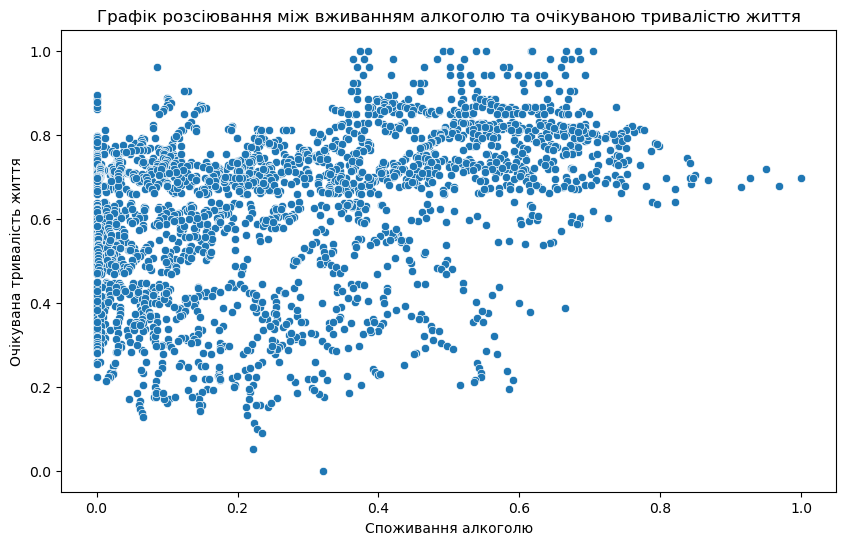

Кореляція між споживанням алкоголю та очікуваною тривалістю життя: 0.40487676112660226


In [49]:
#f.	Позитивний чи негативний зв’язок очікуваної тривалості життя з вживанням алкоголю?

# Вибірка факторів для аналізу
selected_factors = ['Life expectancy ', 'Alcohol']

# Вибірка необхідних факторів
selected_data = data[selected_factors]

# Графік розсіювання між вживанням алкоголю та очікуваною тривалістю життя
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Alcohol', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між вживанням алкоголю та очікуваною тривалістю життя')
plt.xlabel('Споживання алкоголю')
plt.ylabel('Очікувана тривалість життя')
plt.show()

# Розрахунок кореляції між вживанням алкоголю та очікуваною тривалістю життя
alcohol_correlation = selected_data['Alcohol'].corr(selected_data['Life expectancy '])
print(f"Кореляція між споживанням алкоголю та очікуваною тривалістю життя: {alcohol_correlation}")


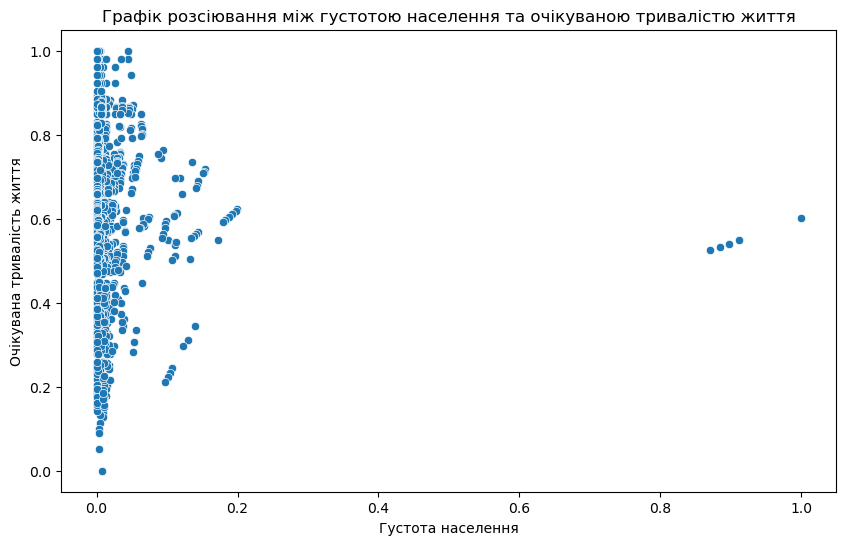

Кореляція між густотою населення та очікуваною тривалістю життя: -0.021538108386786506


In [50]:
#g.	Чи зазвичай у густонаселених країнах тривалість життя нижча?

# Вибірка факторів для аналізу
selected_factors = ['Life expectancy ', 'Population']

# Вибірка необхідних факторів
selected_data = data[selected_factors]

# Графік розсіювання між густотою населення та очікуваною тривалістю життя
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між густотою населення та очікуваною тривалістю життя')
plt.xlabel('Густота населення')
plt.ylabel('Очікувана тривалість життя')
plt.show()

# Розрахунок кореляції між густотою населення та очікуваною тривалістю життя
population_correlation = selected_data['Population'].corr(selected_data['Life expectancy '])
print(f"Кореляція між густотою населення та очікуваною тривалістю життя: {population_correlation}")


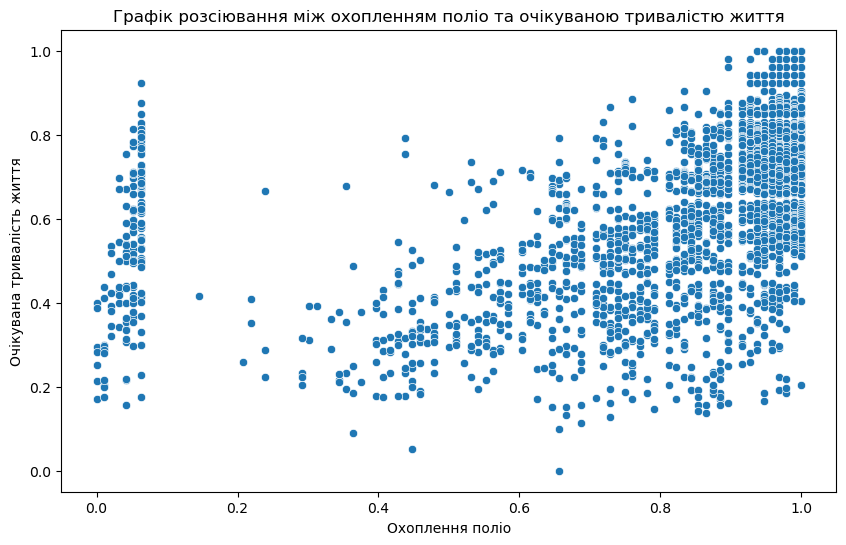

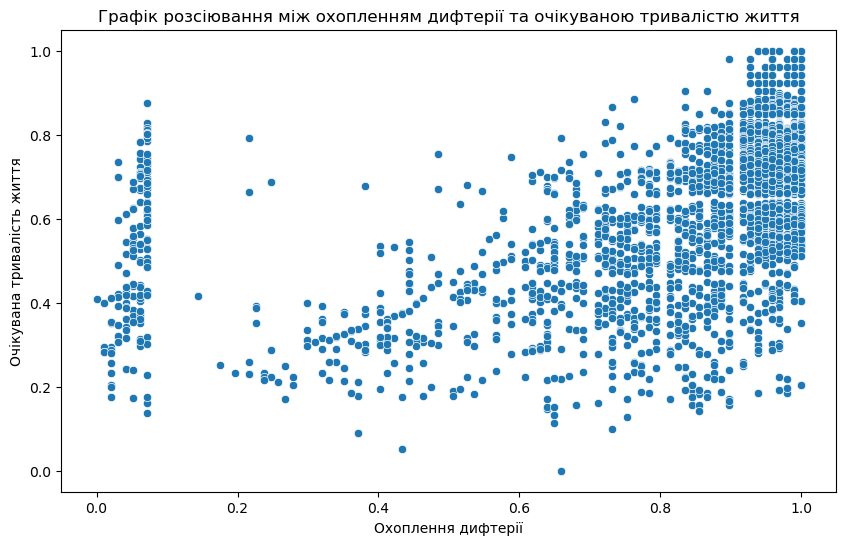

Кореляція між охопленням імунізацією поліо та очікуваною тривалістю життя: 0.46555580597719876
Кореляція між охопленням імунізацією дифтерією та очікуваною тривалістю життя: 0.4794948643415859


In [55]:
#h.	Який вплив охоплення імунізацією на очікувану тривалість життя?

# Вибірка факторів для аналізу
selected_factors = ['Life expectancy ', 'Polio', 'Diphtheria ']

# Вибірка необхідних факторів
selected_data = data[selected_factors]

# Графік розсіювання між охопленням імунізацією та очікуваною тривалістю життя
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Polio', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між охопленням поліо та очікуваною тривалістю життя')
plt.xlabel('Охоплення поліо')
plt.ylabel('Очікувана тривалість життя')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diphtheria ', y='Life expectancy ', data=selected_data)
plt.title('Графік розсіювання між охопленням дифтерії та очікуваною тривалістю життя')
plt.xlabel('Охоплення дифтерії')
plt.ylabel('Очікувана тривалість життя')
plt.show()

# Розрахунок кореляції між охопленням імунізацією та очікуваною тривалістю життя
polio_correlation = selected_data['Polio'].corr(selected_data['Life expectancy '])
diphtheria_correlation = selected_data['Diphtheria '].corr(selected_data['Life expectancy '])

print(f"Кореляція між охопленням імунізацією поліо та очікуваною тривалістю життя: {polio_correlation}")
print(f"Кореляція між охопленням імунізацією дифтерією та очікуваною тривалістю життя: {diphtheria_correlation}")


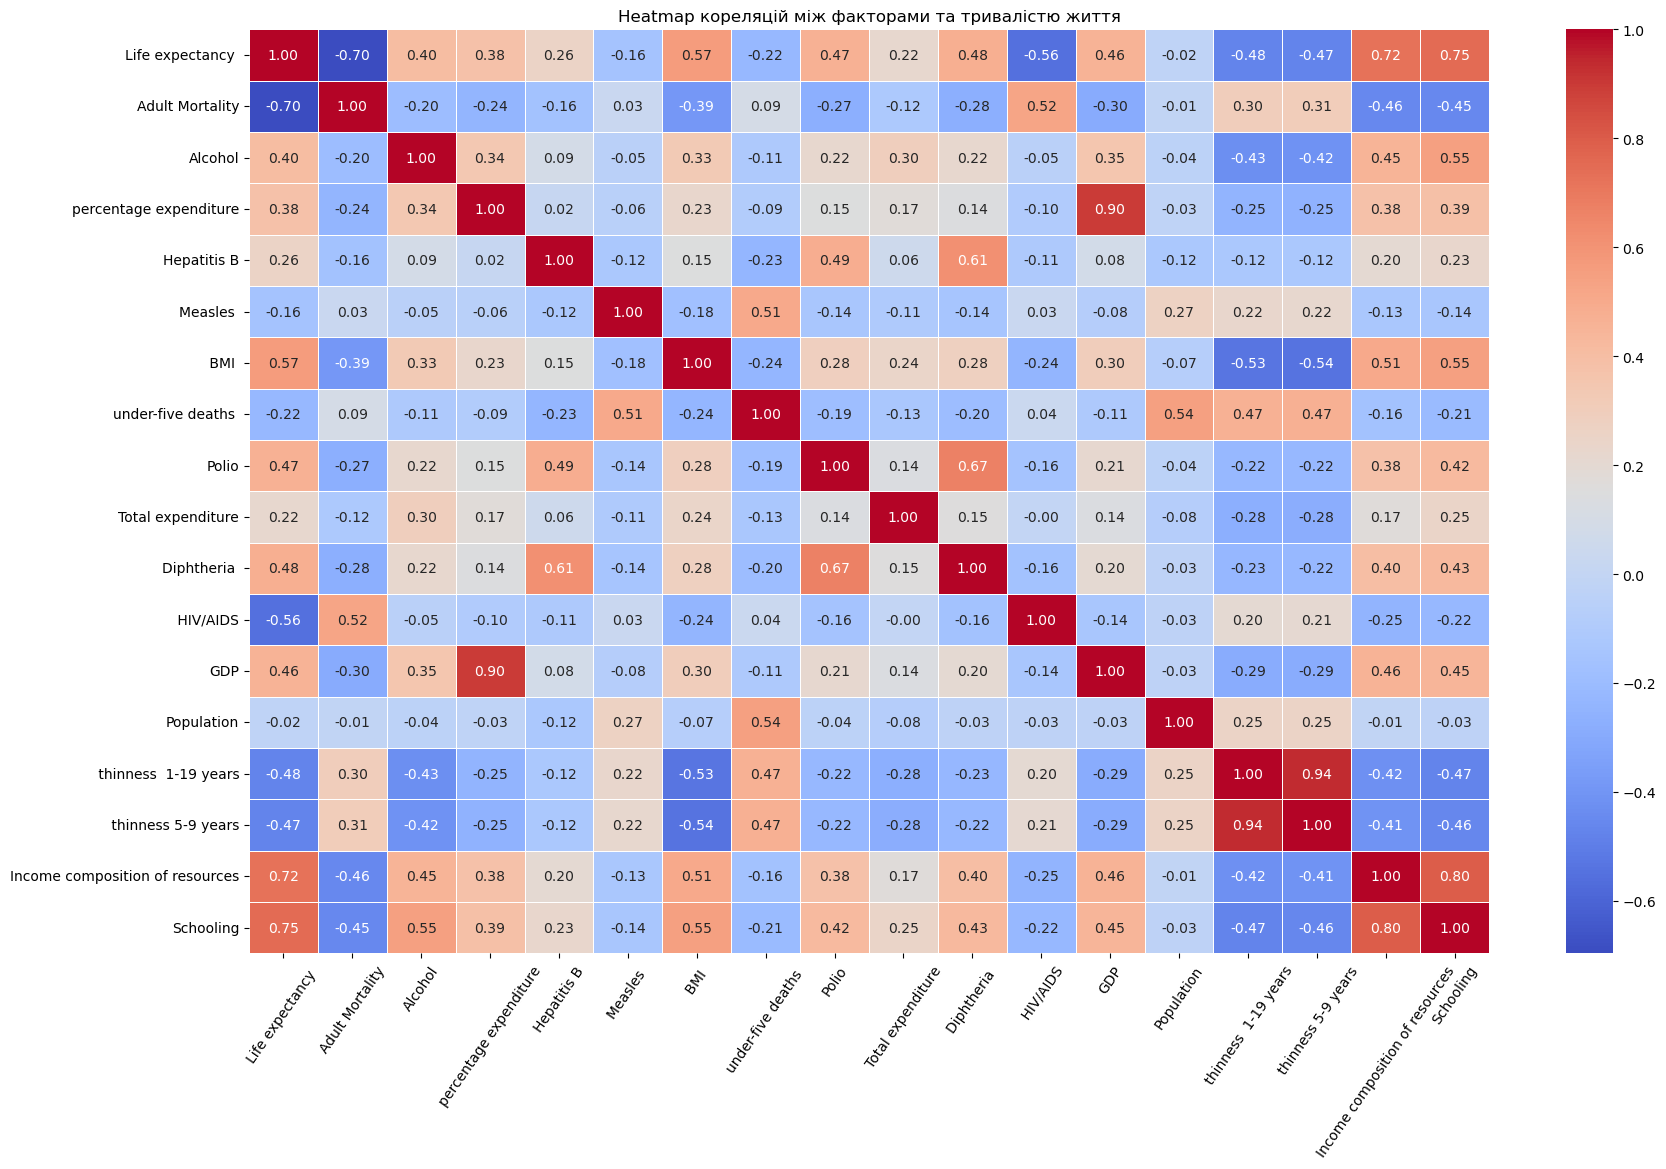

In [52]:
# Вибірка необхідних факторів
selected_data = data[data_selected]

# Розрахунок кореляційної матриці
correlation_matrix = selected_data.corr()

# Візуалізація heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap кореляцій між факторами та тривалістю життя')
plt.xticks(rotation=55)
plt.show()
